# Imports and Basic EDA

In [143]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import re
import folium
from geopy.geocoders import Nominatim
from folium.plugins import HeatMap
from folium import IFrame
from folium.plugins import MarkerCluster
from geopy.distance import geodesic


The aim of this notebook was to provide a comprehensive view of Exploratory Data Analysis (EDA) on different features, both numerical and categorical. We have explored the data using various visualization techniques such as count plots, histograms, distplots, box plots, bar plots, scatter plots, line plots, heatmaps, groupings, clustermaps, and pair plots.

EDA is a crucial step in understanding the underlying patterns and relationships within the data. By visualizing the data, we can extract valuable information and make informed decisions. It allows us to identify trends, outliers, correlations, and other important aspects of the dataset.

In [144]:
data = pd.read_csv('zomato.csv')

In [145]:
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [146]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [147]:
data.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [148]:
data.shape

(51717, 17)

In [149]:
data.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [150]:
data.drop_duplicates(inplace=True)
data.shape

(51717, 17)

In [151]:
data.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

# Data Cleaning

## Renaming Columns

In [152]:
data = data.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type','listed_in(city)':'city'})

## Dropping Unnecessary Columns

In [153]:
del data['url']
del data['phone']
del data['address']
del data['dish_liked']
del data['reviews_list']

## Individual Columns

### Name 

In [154]:
data['name'].unique()

array(['Jalsa', 'Spice Elephant', 'San Churro Cafe', ..., 'Nawabs Empire',
       'SeeYa Restaurant',
       'Plunge - Sheraton Grand Bengaluru Whitefield Hotel &...'],
      dtype=object)

In [155]:
data['name'].value_counts().sum()


51717

In [156]:
data['name'].astype('string')

0                                                    Jalsa
1                                           Spice Elephant
2                                          San Churro Cafe
3                                    Addhuri Udupi Bhojana
4                                            Grand Village
                               ...                        
51712    Best Brews - Four Points by Sheraton Bengaluru...
51713                             Vinod Bar And Restaurant
51714    Plunge - Sheraton Grand Bengaluru Whitefield H...
51715    Chime - Sheraton Grand Bengaluru Whitefield Ho...
51716                         The Nest - The Den Bengaluru
Name: name, Length: 51717, dtype: string

In [157]:
data['name'] = data['name'].str.title()

In [158]:
print(data['name'].value_counts())

name
Cafe Coffee Day                                            96
Onesta                                                     85
Just Bake                                                  74
Empire Restaurant                                          71
Five Star Chicken                                          70
                                                           ..
Hotel Nisarga                                               1
Vishal Sweets, Snacks & Breakfast                           1
Thali15                                                     1
Mast Biryani - Night Express                                1
Plunge - Sheraton Grand Bengaluru Whitefield Hotel &...     1
Name: count, Length: 8743, dtype: int64


##### Identifying the Most Popular Restaurants with Multiple Branches

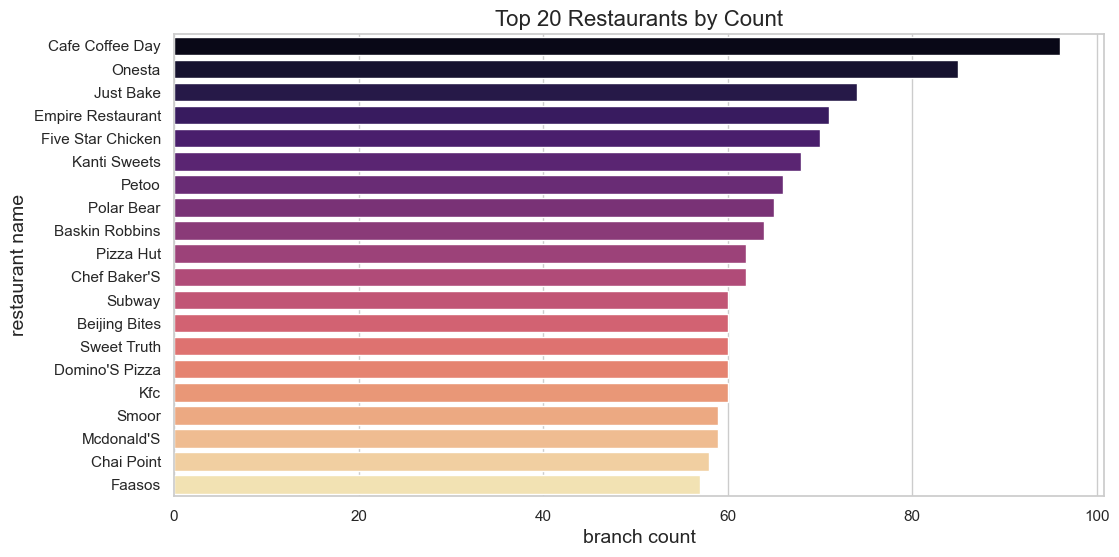

In [159]:
top_20_restaurants = data['name'].value_counts().nlargest(20)
top_20_data = top_20_restaurants.reset_index()
top_20_data.columns = ['name', 'count']

plt.figure(figsize=(12, 6))
sns.barplot(data=top_20_data, x='count', y='name', hue='name', palette='magma', orient='h')
plt.title("Top 20 Restaurants by Count", fontsize=16)
plt.xlabel("branch count", fontsize=14)
plt.ylabel("restaurant name", fontsize=14)
plt.show()



##### Identifying Independant Restaurants

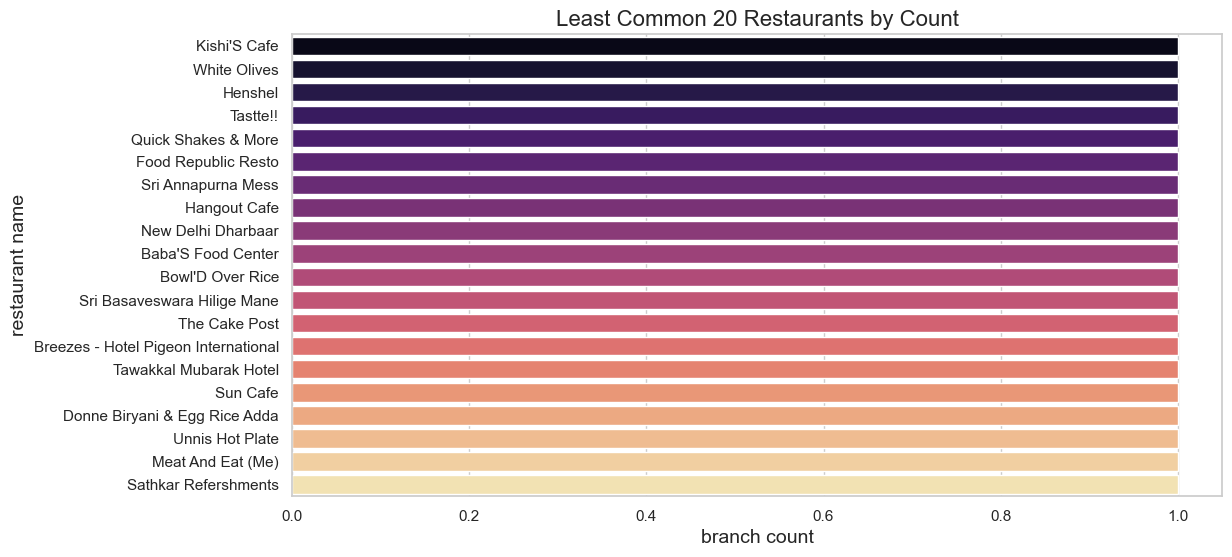

In [160]:

least_20_restaurants = data['name'].value_counts().nsmallest(20)
least_20_data = least_20_restaurants.reset_index()
least_20_data.columns = ['name', 'count']

plt.figure(figsize=(12, 6))
sns.barplot(data=least_20_data, x='count', y='name', hue='name', palette='magma', orient='h')
plt.title("Least Common 20 Restaurants by Count", fontsize=16)
plt.ylabel("restaurant name", fontsize=14)
plt.xlabel("branch count", fontsize=14)
plt.show()


### Online Orders and Book Table

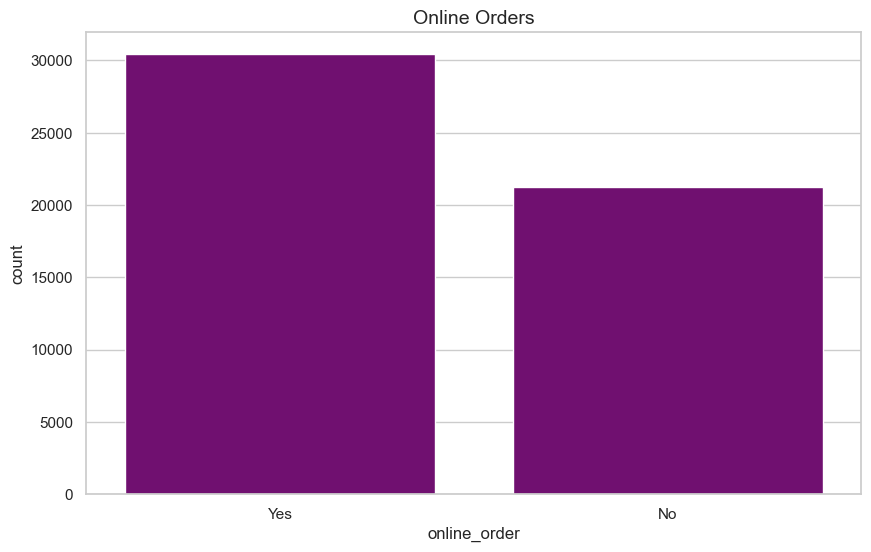

In [161]:
plt.figure(figsize=(10,6))
sns.barplot(data['online_order'].value_counts(),color='purple')
plt.title('Online Orders', fontsize=14)
plt.show()

In [162]:
data.online_order.replace(('Yes','No'),(True, False),inplace=True)

C:\Users\danyadanish\AppData\Local\Temp\ipykernel_21348\4191232955.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.online_order.replace(('Yes','No'),(True, False),inplace=True)
C:\Users\danyadanish\AppData\Local\Temp\ipykernel_21348\4191232955.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True

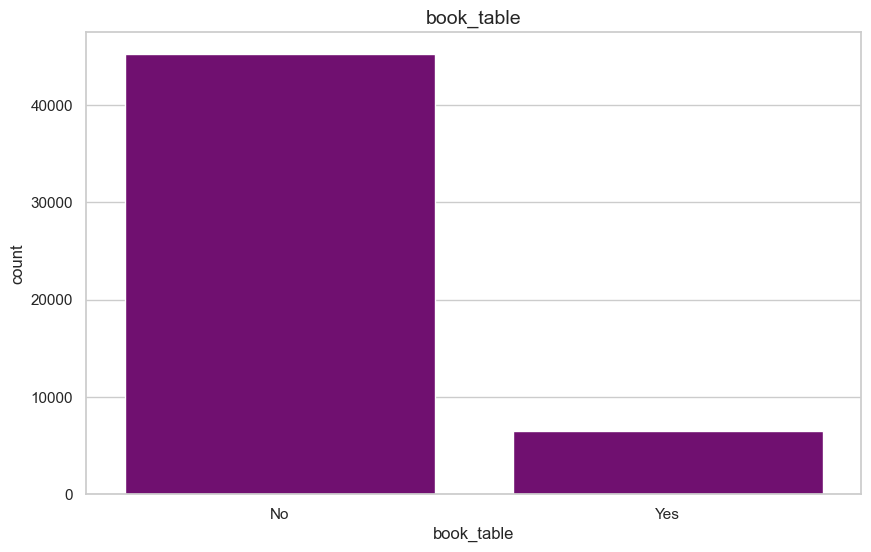

In [163]:
plt.figure(figsize=(10,6))
sns.barplot(data['book_table'].value_counts(),color='purple')
plt.title('book_table', fontsize = 14)
plt.show()

In [164]:
data['book_table'].replace(('Yes','No'),(True, False),inplace=True)

C:\Users\danyadanish\AppData\Local\Temp\ipykernel_21348\4097203721.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['book_table'].replace(('Yes','No'),(True, False),inplace=True)
C:\Users\danyadanish\AppData\Local\Temp\ipykernel_21348\4097203721.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', Tru

In [165]:
temp_data = data[['online_order', 'book_table']].copy()
temp_data['online_order'].replace((True, False), (1, 0), inplace=True)
temp_data['book_table'].replace((True, False), (1, 0), inplace=True)

C:\Users\danyadanish\AppData\Local\Temp\ipykernel_21348\3160817282.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  temp_data['online_order'].replace((True, False), (1, 0), inplace=True)
C:\Users\danyadanish\AppData\Local\Temp\ipykernel_21348\3160817282.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', 

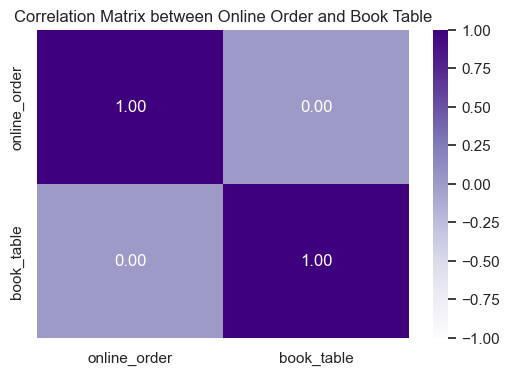

In [166]:
correlation_matrix = data[['online_order', 'book_table']].corr()
plt.figure(figsize=(6, 4)) 
sns.heatmap(correlation_matrix, annot=True, cmap='Purples', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix between Online Order and Book Table')
plt.show() #checking the correlation of boolean attributes

*This matrix suggests that online ordering and table booking are independent*

### Rate

In [167]:
data['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [168]:
data['rate'] = data['rate'].replace(['NEW', '-'], np.nan) #replacing the 2 non numeric values in the rate column with NA

data['rate'] = data['rate'].apply(lambda x: float(str(x).split('/')[0]) if isinstance(x, str) and '/' in x else x) #We are removing the /5 to just have the numeric rating only

data['rate'] = pd.to_numeric(data['rate'], errors='coerce') 




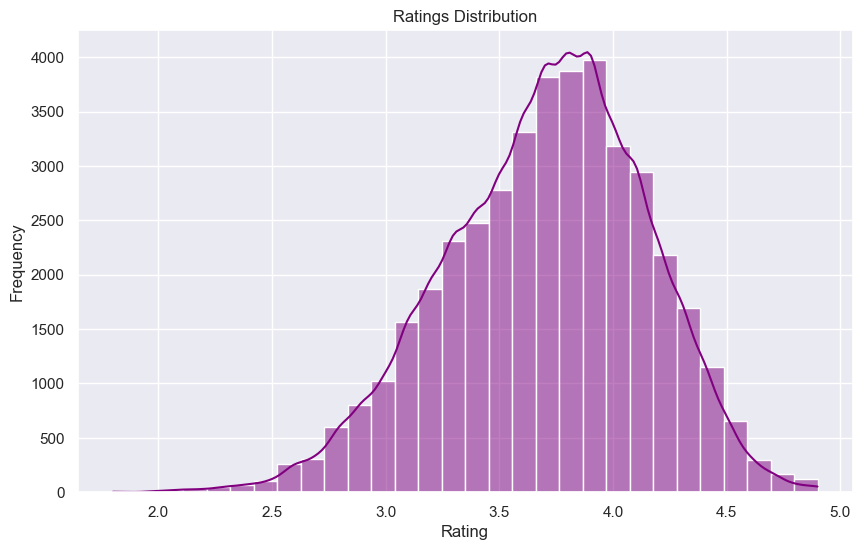

In [169]:
plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")
sns.histplot(data['rate'].dropna(), kde=True, bins=30, color='purple')
plt.title('Ratings Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

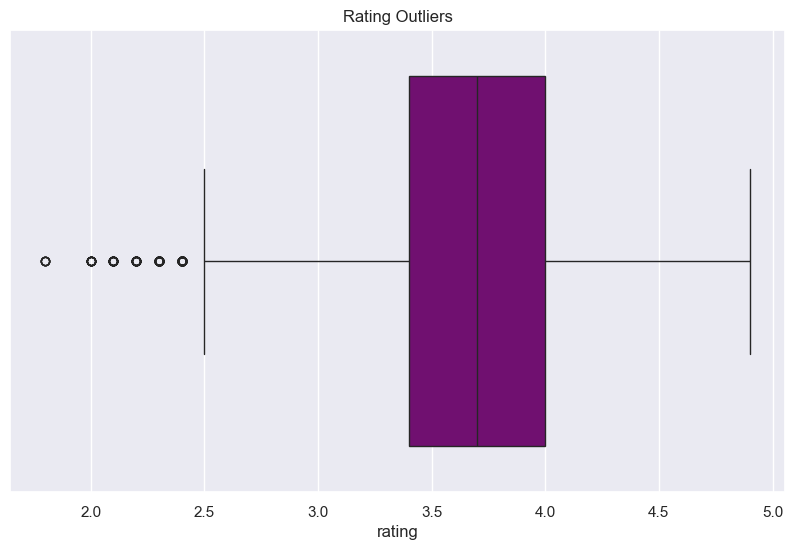

In [170]:
plt.figure(figsize=(10,6))
sns.boxplot(x=data['rate'].dropna(), color ='purple')
plt.xlabel('rating')
plt.title('Rating Outliers')
plt.show()

###### Based on the plots we can determine that the data is skewed. This is why we decided to fill in missing values with the median

In [171]:
data['rate'] = data['rate'].fillna(data['rate'].median())


<Axes: xlabel='rate'>

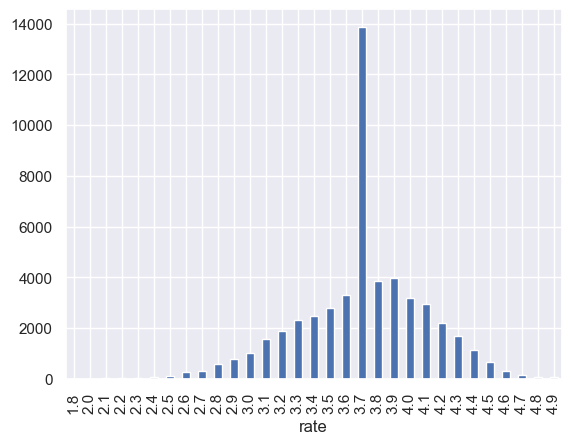

In [172]:
data['rate'].value_counts().sort_index().plot.bar()

### Cost

In [173]:
data['cost'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [174]:
data['cost'] = data['cost'].str.replace(',','')

In [175]:
print(data['cost'].dtype)

object


In [176]:
data['cost'].isna().sum()

346

In [177]:
data['cost'] = data['cost'].astype('float')

<Axes: xlabel='cost', ylabel='Count'>

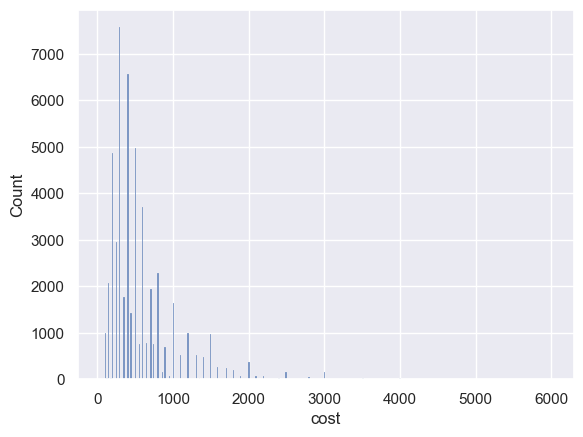

In [178]:
sns.histplot(data['cost'])

In [179]:
data['cost'] = data.groupby('name')['cost'].transform(lambda x: x.fillna(x.median()))

C:\Users\danyadanish\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\danyadanish\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\danyadanish\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\danyadanish\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarnin

### Votes

In [180]:
data['votes'].unique()

array([ 775,  787,  918, ..., 4957, 2382,  843], dtype=int64)

In [181]:
data.votes.describe()

count    51717.000000
mean       283.697527
std        803.838853
min          0.000000
25%          7.000000
50%         41.000000
75%        198.000000
max      16832.000000
Name: votes, dtype: float64

In [182]:
data.votes.isna().sum()

0

<Axes: ylabel='Frequency'>

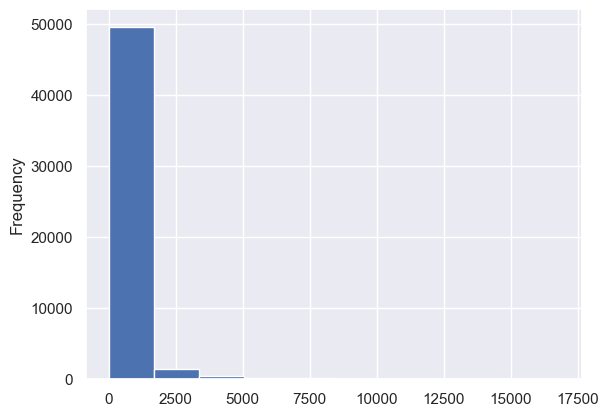

In [183]:
data['votes'].plot.hist()
#We can infer that the data is skewed to the right.Hence we need to perform the transformation or we can just simply remove the outliers.

### Location

In [184]:
data['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', nan, 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Sarjapur Road', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Whitefield', 'East Bangalore', 'Old Airport Road',
       'Indiranagar', 'Koramangala 1st Block', 'Frazer Town', 'RT Nagar',
       'MG Road', 'Brigade Road', 'Lavelle Road', 'Church Street',
       'Ulsoor', 'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road',
       'Commercial Street', 'Vasanth Nagar', 'HBR Layout', 'Domlur',
       'Ejipura', 'Jeevan 

In [185]:
data['location'].astype('string')

0                      Banashankari
1                      Banashankari
2                      Banashankari
3                      Banashankari
4                      Basavanagudi
                    ...            
51712                    Whitefield
51713                    Whitefield
51714                    Whitefield
51715    ITPL Main Road, Whitefield
51716    ITPL Main Road, Whitefield
Name: location, Length: 51717, dtype: string

In [186]:
data['location'].isna().sum()

21

In [187]:
data = data.dropna(subset='location')

In [188]:
data['location'].isna().sum()

0

C:\Users\danyadanish\AppData\Local\Temp\ipykernel_21348\3176630593.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(restaurant_locations,palette="Set2",orient='y')


Text(0.5, 1.0, 'Areas Known for Their Food')

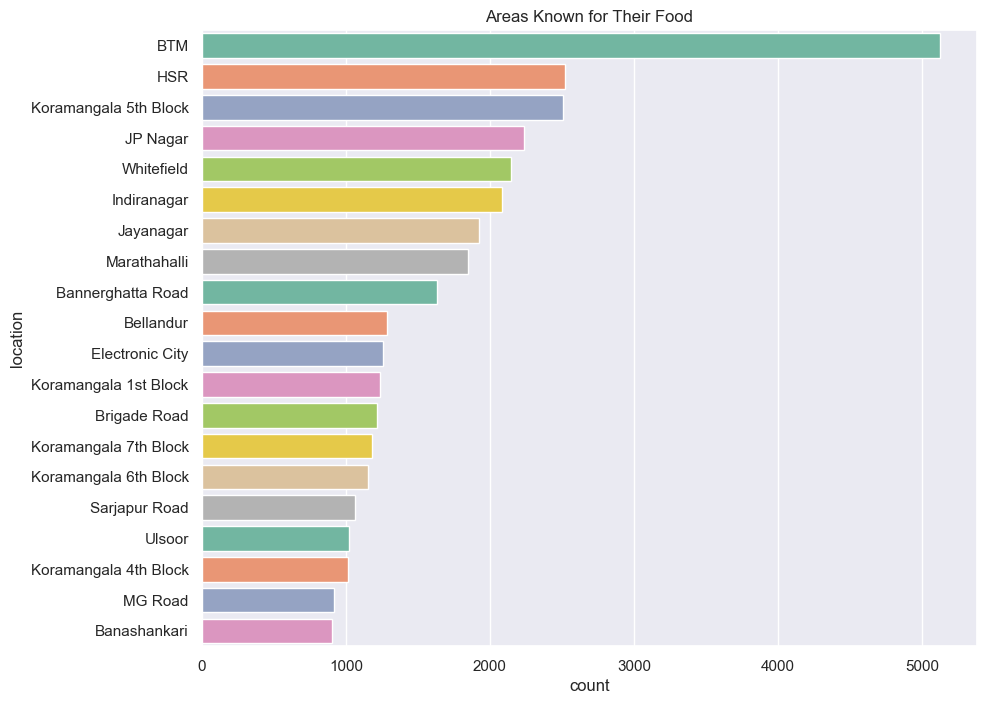

In [189]:
plt.figure(figsize=(10,8))
restaurant_locations=data['location'].value_counts()[:20]
sns.barplot(restaurant_locations,palette="Set2",orient='y')
plt.title("Areas Known for Their Food")

### Restaurant Type

In [190]:
data['rest_type'].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Beverage Shop, Quick Bites', 'Confectionery',
       'Quick Bites, Beverage Shop', 'Dessert Parlor, Sweet Shop',
       'Bakery, Quick Bites', 'Sweet Shop, Quick Bites', 'Kiosk',
       'Food Truck', 'Quick Bites, Dessert Parlor',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Dessert Parlor, Quick Bites',
       'Microbrewery, Casual Dining', 'Lounge', 'Bar, Casual Dining',
       'Food Court', 'Cafe, Bakery', nan, 'Dhaba',
       'Quick Bites, Sweet Shop', 'Microbrewery',
       'Food Court, Quick Bites', 'Pub, Bar', 'Casual Dining, Pub',
      

In [191]:
data['rest_type'].nunique()  # 93 unique values

# Cleaning and formatting the text in 'rest_type' column
data['rest_type'] = data['rest_type'].str.lower().str.strip()
data['rest_type'] = data['rest_type'].str.split(', ')
data['rest_type'] = data['rest_type'].fillna('')

In [192]:
standardization_map = {
    'casual dining': 'casual dining',
    'quick bites': 'quick bites',
    'cafe': 'cafe',
    'bar': 'bar',
    'pub': 'bar',  
    'microbrewery': 'microbrewery',
    'lounge': 'lounge',
    'fine dining': 'fine dining',
    'bakery': 'bakery',
    'delivery': 'delivery',
    'takeaway': 'takeaway',
    'beverage shop': 'beverage shop',
    'dessert parlor': 'dessert parlor',
    'sweet shop': 'sweet shop',
    'food court': 'food court',
    'kiosk': 'kiosk',
    'club': 'club',
    'mess': 'mess',
    'bhojanalya': 'bhojanalya',
    'pop up': 'pop up',
    'meat shop': 'meat shop',
    'irani cafee': 'irani cafe'
}

In [193]:
data['rest_type'] = data['rest_type'].apply(lambda types: list({standardization_map.get(t.strip(), t) for t in types}))
data['rest_type'] = data['rest_type'].apply(lambda x: ', '.join(x))

In [194]:
data['rest_type'].nunique()
data['rest_type'].unique()

array(['casual dining', 'cafe, casual dining', 'quick bites', 'cafe',
       'quick bites, cafe', 'delivery', 'mess', 'dessert parlor',
       'bakery, dessert parlor', 'bar', 'bakery', 'takeaway, delivery',
       'fine dining', 'beverage shop', 'sweet shop',
       'quick bites, beverage shop', 'confectionery',
       'sweet shop, dessert parlor', 'quick bites, bakery',
       'quick bites, sweet shop', 'kiosk', 'food truck',
       'quick bites, dessert parlor', 'dessert parlor, beverage shop',
       'takeaway', 'bar, casual dining', 'casual dining, microbrewery',
       'lounge', 'food court', 'cafe, bakery', '', 'dhaba',
       'microbrewery', 'quick bites, food court', 'lounge, bar',
       'food court, dessert parlor', 'casual dining, sweet shop',
       'casual dining, food court', 'dessert parlor, sweet shop',
       'bakery, beverage shop', 'lounge, casual dining',
       'cafe, food court', 'cafe, beverage shop', 'cafe, dessert parlor',
       'bar, microbrewery', 'bakery, 

### Cuisines

In [195]:
#cuisines
data['cuisines'].nunique()
data['cuisines'].unique().tolist() 

['North Indian, Mughlai, Chinese',
 'Chinese, North Indian, Thai',
 'Cafe, Mexican, Italian',
 'South Indian, North Indian',
 'North Indian, Rajasthani',
 'North Indian',
 'North Indian, South Indian, Andhra, Chinese',
 'Pizza, Cafe, Italian',
 'Cafe, Italian, Continental',
 'Cafe, Mexican, Italian, Momos, Beverages',
 'Cafe',
 'Cafe, Chinese, Continental, Italian',
 'Cafe, Continental',
 'Cafe, Fast Food, Continental, Chinese, Momos',
 'Chinese, Cafe, Italian',
 'Cafe, Italian, American',
 'Cafe, French, North Indian',
 'Cafe, Pizza, Fast Food, Beverages',
 'Cafe, Fast Food',
 'Italian, Fast Food, Cafe, European',
 'Cafe, Bakery',
 'Cafe, South Indian',
 'Cafe, Fast Food, Beverages',
 'North Indian, Cafe, Chinese, Fast Food',
 'Cafe, Italian',
 'North Indian, Fast Food, Chinese, Burger',
 'Bakery, Desserts',
 'Pizza',
 'North Indian, Biryani, Fast Food',
 'Biryani',
 'North Indian, Chinese, Fast Food',
 'Chinese, Thai, Momos',
 'North Indian, Mughlai, South Indian, Chinese',
 'South I

In [196]:
print(data['cuisines'].str.strip().str.split(', ').explode().unique())


['North Indian' 'Mughlai' 'Chinese' 'Thai' 'Cafe' 'Mexican' 'Italian'
 'South Indian' 'Rajasthani' 'Andhra' 'Pizza' 'Continental' 'Momos'
 'Beverages' 'Fast Food' 'American' 'French' 'European' 'Bakery' 'Burger'
 'Desserts' 'Biryani' 'Street Food' 'Rolls' 'Ice Cream' 'Healthy Food'
 'Salad' 'Asian' 'Korean' 'Indonesian' 'Japanese' 'Goan' 'Seafood' 'Kebab'
 'Steak' 'Mithai' 'Iranian' 'Sandwich' 'Juices' 'Mangalorean' 'Vietnamese'
 'Hyderabadi' 'Bengali' 'Arabian' 'BBQ' 'Tea' 'Afghani' 'Lebanese'
 'Finger Food' 'Tibetan' nan 'Charcoal Chicken' 'Middle Eastern'
 'Mediterranean' 'Wraps' 'Kerala' 'Oriya' 'Bihari' 'Roast Chicken'
 'Maharashtrian' 'Bohri' 'African' 'Nepalese' 'Turkish' 'Tamil' 'Tex-Mex'
 'Belgian' 'Gujarati' 'South American' 'Konkan' 'Drinks Only' 'Awadhi'
 'Chettinad' 'Coffee' 'Indian' 'Afghan' 'Modern Indian' 'Lucknowi'
 'Australian' 'Kashmiri' 'Spanish' 'Malaysian' 'Burmese' 'Sushi'
 'Portuguese' 'Parsi' 'Greek' 'North Eastern' 'Bar Food' 'Singaporean'
 'Naga' 'Cantonese' 

In [197]:
specific_mapping = {
    "North Indian": [
        "North Indian", "Punjabi", "Awadhi", "Kashmiri", "Lucknowi", "Rajasthani"
    ],
    "South Indian": [
        "South Indian", "Andhra", "Chettinad", "Hyderabadi", "Mangalorean", "Kerala"
    ],
    "East Indian": [
        "Bengali", "Oriya", "Assamese", "North Eastern", "Naga"
    ],
    "West Indian": [
        "Maharashtrian", "Gujarati", "Goan", "Konkan", "Malwani"
    ],
    "Asian": [
        "Chinese", "Thai", "Japanese", "Korean", "Indonesian", "Vietnamese",
        "Singaporean", "Cantonese", "Mongolian", "Sri Lankan", "Malaysian", "Burmese"
    ],
    "European": [
        "Italian", "French", "Continental", "Greek", "Portuguese", "Spanish",
        "German", "British", "Russian", "Belgian"
    ],
    "Middle Eastern": [
        "Lebanese", "Arabian", "Afghani", "Turkish", "Iranian", "Afghan"
    ],
    "American": [
        "American", "BBQ", "Tex-Mex", "Burger", "Hot dogs", "Steak"
    ],
    "Desserts": [
        "Ice Cream", "Mithai", "Desserts", "Paan", "Bubble Tea"
    ],
    "Fast Food": [
        "Pizza", "Biryani", "Street Food", "Rolls", "Sandwich", "Finger Food", "Charcoal Chicken", "Roast Chicken"
    ],
    "Beverages": [
        "Juices", "Tea", "Coffee", "Beverages", "Drinks Only"
    ],
    "Seafood": [
        "Seafood", "Goan", "Malwani", "Konkan"
    ],
    "Healthy": [
        "Salad", "Healthy Food", "Vegan", "Raw Meats"
    ],
    "Fusion": [
        "Modern Indian", "Tex-Mex", "Pan Asian", "Bar Food", "Grill"
    ],
    "Specialty": [
        "Sushi", "Steak", "Kebab", "Charcoal Chicken", "Roast Chicken"
    ],
    "Bakery": [
        "Bakery", "Pastries", "Cakes"
    ]
}



def map_cuisine_specific(cuisine):
    for category, cuisines in specific_mapping.items():
        if cuisine in cuisines:
            return category
    return cuisine


def map_cuisine_list(cuisine_list):
    if isinstance(cuisine_list, list):
        return list({map_cuisine_specific(c.strip()) for c in cuisine_list})
    elif isinstance(cuisine_list, str): 
        return [map_cuisine_specific(cuisine_list.strip())]
    return [cuisine_list.str] 

In [198]:
data['cuisines'] = data['cuisines'].astype('string')

In [199]:
data['cuisines'] = data['cuisines'].str.strip()
data['cuisines'] = data['cuisines'].str.split(', ')

In [200]:
data['cuisines'] = data['cuisines'].fillna('')

In [201]:
data['cuisines'] = data['cuisines'].apply(map_cuisine_list)
data['cuisines'] = data['cuisines'].apply(lambda x: ', '.join(x))
data['cuisines'].nunique()

809

In [202]:
data['cuisines'].sample(30)

48790                           North Indian, European
23865                                             Cafe
5367                               Beverages, Desserts
4214          Fast Food, North Indian, Asian, European
30072                        American, Asian, European
33587    North Indian, Middle Eastern, Mughlai, Fusion
30616     Fast Food, South Indian, North Indian, Asian
32088                       South Indian, North Indian
31579                             Fast Food, Specialty
2111                                             Asian
10220                              Fast Food, Desserts
4771                               North Indian, Asian
5718                    Fast Food, North Indian, Asian
45606                                         Desserts
1212                               Fast Food, Desserts
49097                      Fast Food, American, Bakery
2098                           Beverages, South Indian
28884             Fast Food, Beverages, Middle Eastern
17073     

C:\Users\danyadanish\AppData\Local\Temp\ipykernel_21348\2669036744.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(cuisines,orient='y', palette='Set2')


Text(0.5, 1.0, 'Most popular cuisines of Bangalore')

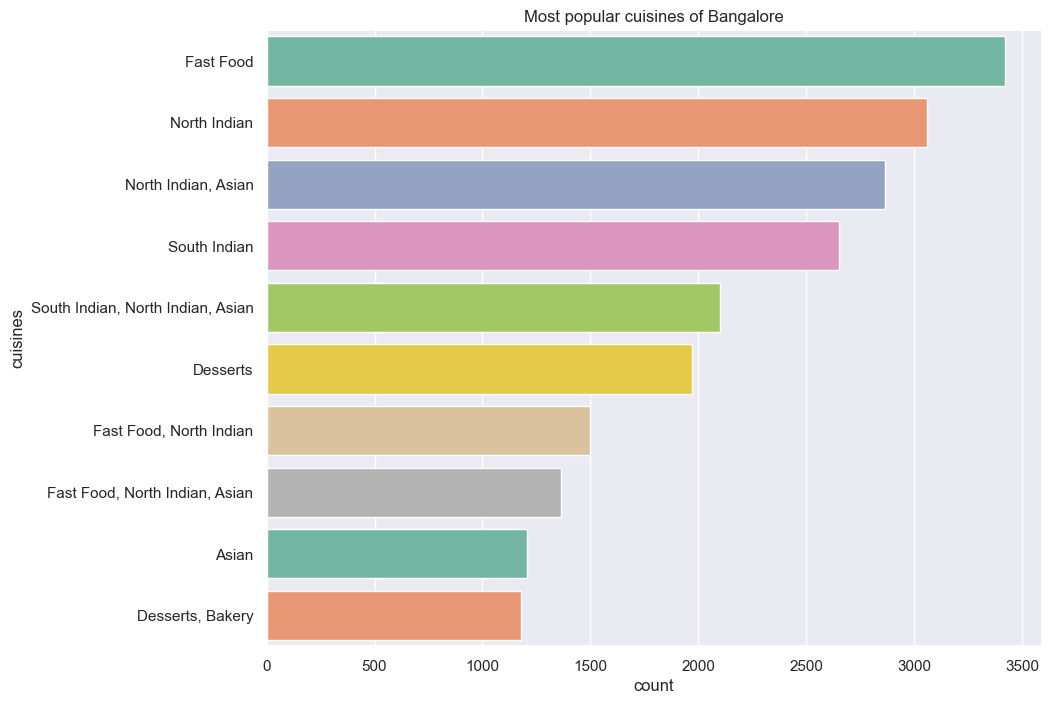

In [203]:
plt.figure(figsize=(10,8))
cuisines=data['cuisines'].value_counts()[:10]
sns.barplot(cuisines,orient='y', palette='Set2')
plt.title("Most popular cuisines of Bangalore")

### Menu Item

In [204]:
data['menu_item'].unique()

array(['[]',
       "['Chocolate Fantasy (Pack Of 5)', 'Pan Cake (Pack Of 6)', 'Gulab Jamun (Pack Of 10)', 'Gulkand Shot (Pack Of 5)', 'Chocolate Decadence (Pack of 2)', 'CheeseCake (Pack Of 2)', 'Red Velvet Slice Cake (Pack of 2)', 'Red Velvet Slice Cake & Cheese Cake (Pack of 2)', 'Red Velvet Slice Cake & Chocolate Decadence Cake (Pack of 2)', 'Hazelnut Brownie (Pack of 2)', 'Moments', 'Red Velvet Cake With Butter Cream Frosting (750 Gm)', 'Red Velvet Slice Cake (Pack of 2)', 'Red Velvet Slice Cake & Cheese Cake (Pack of 2)', 'Red Velvet Slice Cake & Chocolate Decadence Cake (Pack of 2)', 'Red Velvet Slice Cake (Pack of 1)', 'Valentine Red Velvet Jar', 'Valentine Chocolate Jar', 'Valentines Jar Combo', 'Pink Guava 500 ML', 'Oreo Vanilla 500 ML', 'Cookie Crumble 500 ML', 'Chocolate Fantasy', 'Gulkand-E-Bahar', 'Pan Cake', 'Hazelnut Brownie (Pack Of 1)', 'Gulab Jamun (Pack Of 2)', 'Plum Cake', 'Red Velvet Cake With Butter Cream Frosting (750 Gm)', 'Chocolate Mud Cake (700 Gms)', 'Chees

In [205]:
def replace_inner_brackets(s):
    # This will replace square brackets with round brackets inside the string
    return re.sub(r'\[([^\[\]]+)\]', r'(\1)', s)

data['menu_item'] = data['menu_item'].apply(replace_inner_brackets)
data['menu_item'] = data['menu_item'].replace("\\'", "'").replace("\\x", "")

In [206]:
data['menu_item'].astype('string')

0        []
1        []
2        []
3        []
4        []
         ..
51712    []
51713    []
51714    []
51715    []
51716    []
Name: menu_item, Length: 51696, dtype: string

In [207]:
data['menu_item'].unique()

array(['[]',
       "('Chocolate Fantasy (Pack Of 5)', 'Pan Cake (Pack Of 6)', 'Gulab Jamun (Pack Of 10)', 'Gulkand Shot (Pack Of 5)', 'Chocolate Decadence (Pack of 2)', 'CheeseCake (Pack Of 2)', 'Red Velvet Slice Cake (Pack of 2)', 'Red Velvet Slice Cake & Cheese Cake (Pack of 2)', 'Red Velvet Slice Cake & Chocolate Decadence Cake (Pack of 2)', 'Hazelnut Brownie (Pack of 2)', 'Moments', 'Red Velvet Cake With Butter Cream Frosting (750 Gm)', 'Red Velvet Slice Cake (Pack of 2)', 'Red Velvet Slice Cake & Cheese Cake (Pack of 2)', 'Red Velvet Slice Cake & Chocolate Decadence Cake (Pack of 2)', 'Red Velvet Slice Cake (Pack of 1)', 'Valentine Red Velvet Jar', 'Valentine Chocolate Jar', 'Valentines Jar Combo', 'Pink Guava 500 ML', 'Oreo Vanilla 500 ML', 'Cookie Crumble 500 ML', 'Chocolate Fantasy', 'Gulkand-E-Bahar', 'Pan Cake', 'Hazelnut Brownie (Pack Of 1)', 'Gulab Jamun (Pack Of 2)', 'Plum Cake', 'Red Velvet Cake With Butter Cream Frosting (750 Gm)', 'Chocolate Mud Cake (700 Gms)', 'Chees

In [208]:
data[data['menu_item'] == '[]'].count()

name            39596
online_order    39596
book_table      39596
rate            39596
votes           39596
location        39596
rest_type       39596
cuisines        39596
cost            39459
menu_item       39596
type            39596
city            39596
dtype: int64

### Type

In [209]:
data['type'].unique()

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

In [210]:
data['type'].astype('string')

0               Buffet
1               Buffet
2               Buffet
3               Buffet
4               Buffet
             ...      
51712    Pubs and bars
51713    Pubs and bars
51714    Pubs and bars
51715    Pubs and bars
51716    Pubs and bars
Name: type, Length: 51696, dtype: string

### City

In [211]:
data['city'].unique()

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

In [212]:
data['city'].astype('string')

0        Banashankari
1        Banashankari
2        Banashankari
3        Banashankari
4        Banashankari
             ...     
51712      Whitefield
51713      Whitefield
51714      Whitefield
51715      Whitefield
51716      Whitefield
Name: city, Length: 51696, dtype: string

## Correlations Between Numeric Attributes

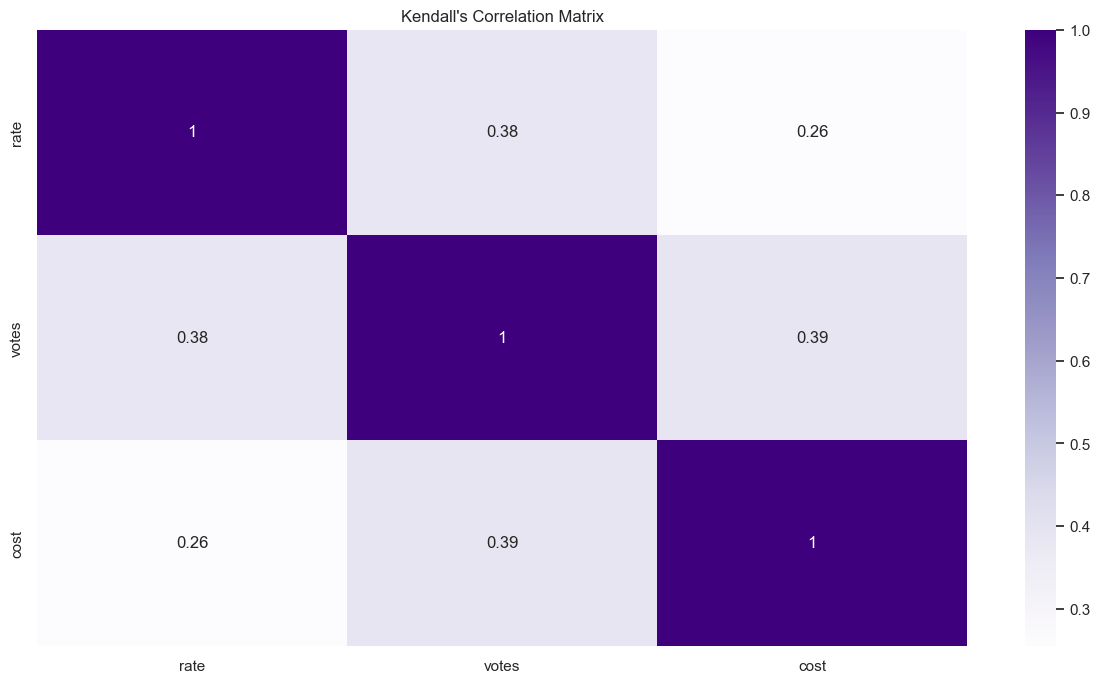

In [213]:
numeric_data = data.select_dtypes(include=['number'])

corr = numeric_data.corr(method='kendall')

plt.figure(figsize=(15, 8))
sns.heatmap(corr, annot=True, cmap='Purples')
plt.title("Kendall's Correlation Matrix")
plt.show()

## Categorical Outliers

*Identifying categorical outliers by checking the distribution*

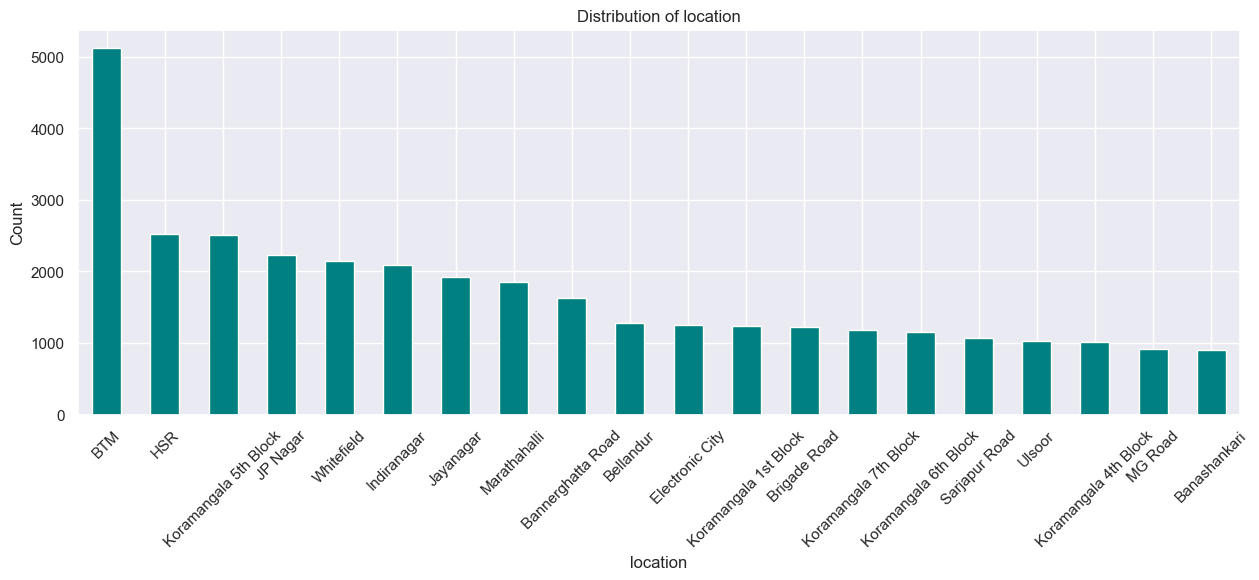

Top 10 most frequent location values:

location
BTM                      5124
HSR                      2523
Koramangala 5th Block    2504
JP Nagar                 2235
Whitefield               2144
Indiranagar              2083
Jayanagar                1926
Marathahalli             1846
Bannerghatta Road        1630
Bellandur                1286
Name: count, dtype: int64
Top 10 least frequent location values:

location
Hebbal                  14
North Bangalore         14
Kengeri                  9
Nagarbhavi               9
Central Bangalore        8
West Bangalore           6
Yelahanka                6
Jakkur                   3
Rajarajeshwari Nagar     2
Peenya                   1
Name: count, dtype: int64


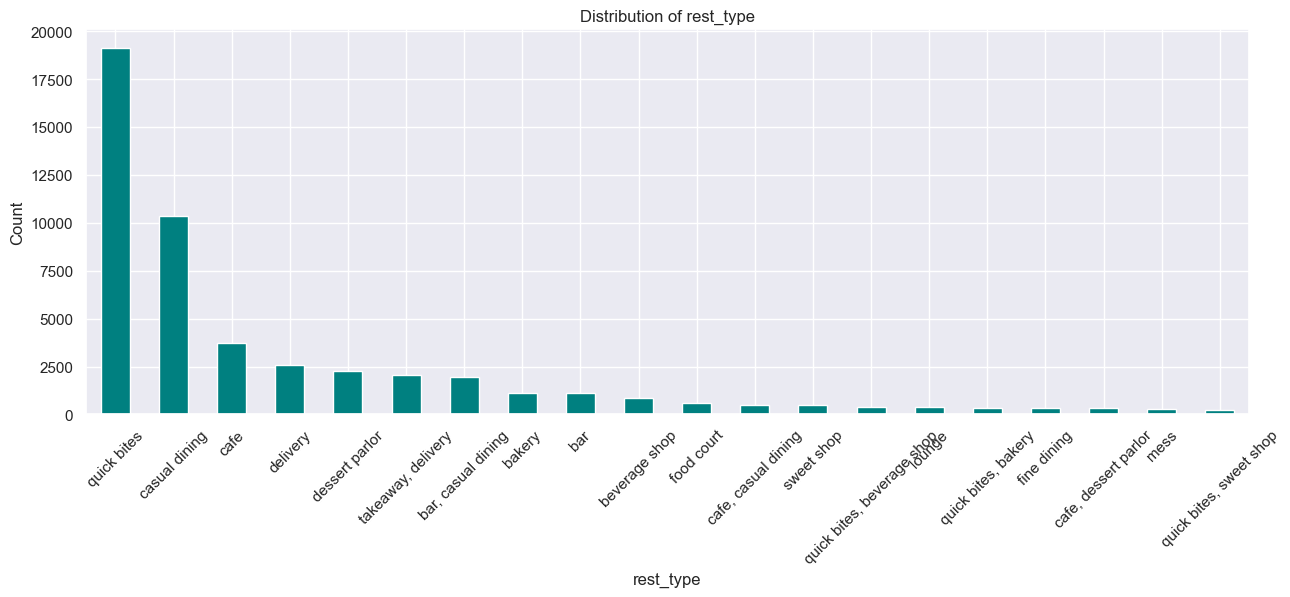

Top 10 most frequent rest_type values:

rest_type
quick bites           19132
casual dining         10330
cafe                   3732
delivery               2604
dessert parlor         2263
takeaway, delivery     2037
bar, casual dining     1961
bakery                 1141
bar                    1099
beverage shop           867
Name: count, dtype: int64
Top 10 least frequent rest_type values:

rest_type
casual dining, club           4
bhojanalya                    3
bakery, sweet shop            3
food court, beverage shop     2
bakery, food court            2
pop up                        2
cafe, food court              2
dessert parlor, kiosk         2
dessert parlor, sweet shop    1
quick bites, kiosk            1
Name: count, dtype: int64


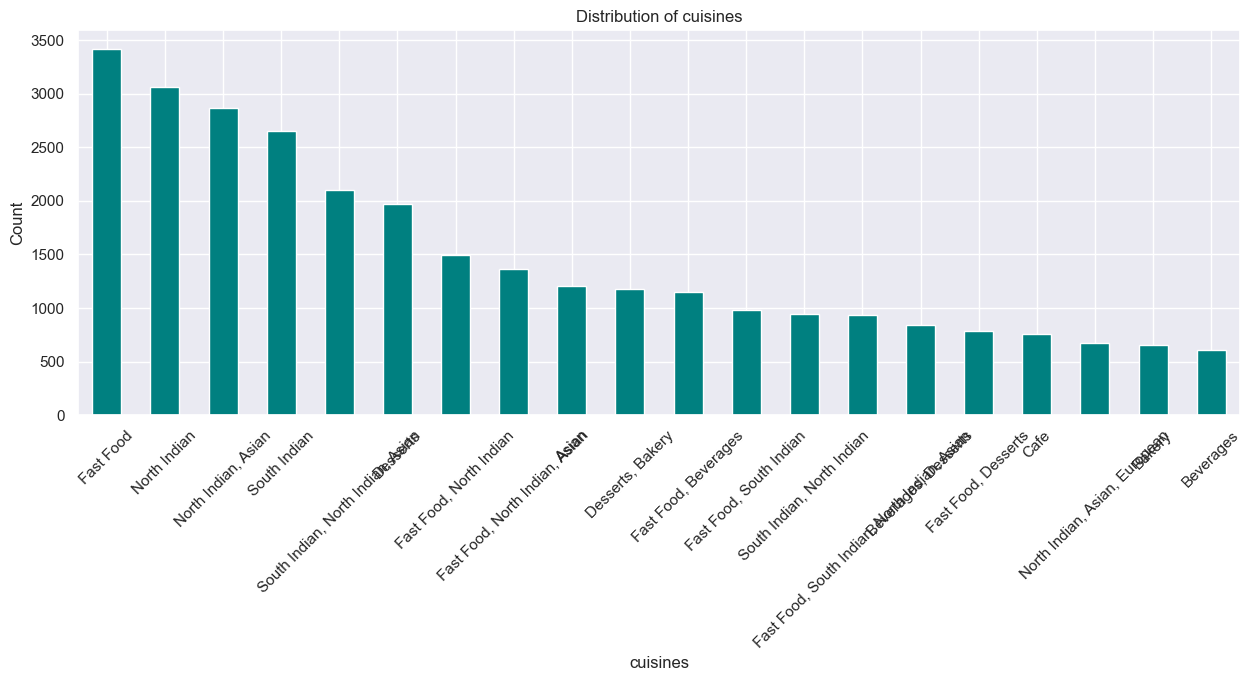

Top 10 most frequent cuisines values:

cuisines
Fast Food                            3420
North Indian                         3062
North Indian, Asian                  2865
South Indian                         2654
South Indian, North Indian, Asian    2100
Desserts                             1973
Fast Food, North Indian              1497
Fast Food, North Indian, Asian       1365
Asian                                1205
Desserts, Bakery                     1180
Name: count, dtype: int64
Top 10 least frequent cuisines values:

cuisines
Specialty, Seafood, North Indian, Asian                       1
South Indian, North Indian, Mughlai, European                 1
Desserts, North Indian, Asian, East Indian                    1
Beverages, North Indian, Asian, East Indian                   1
Fast Food, South Indian, East Indian                          1
Beverages, North Indian, Middle Eastern, Asian, Desserts      1
Healthy, North Indian, Cafe, European, Fast Food, Desserts    1
South Ind

In [214]:
categorical_columns = ['location', 'rest_type', 'cuisines']

for col in categorical_columns:
    plt.figure(figsize=(15, 5))
    data[col].value_counts().head(20).plot(kind='bar', color='teal')  # Show top 20 categories
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

    print(f"Top 10 most frequent {col} values:\n")
    print(data[col].value_counts().head(10))
    print(f"Top 10 least frequent {col} values:\n")
    print(data[col].value_counts().tail(10))  

## Numerical Outliers

*Before removing numerical outliers*


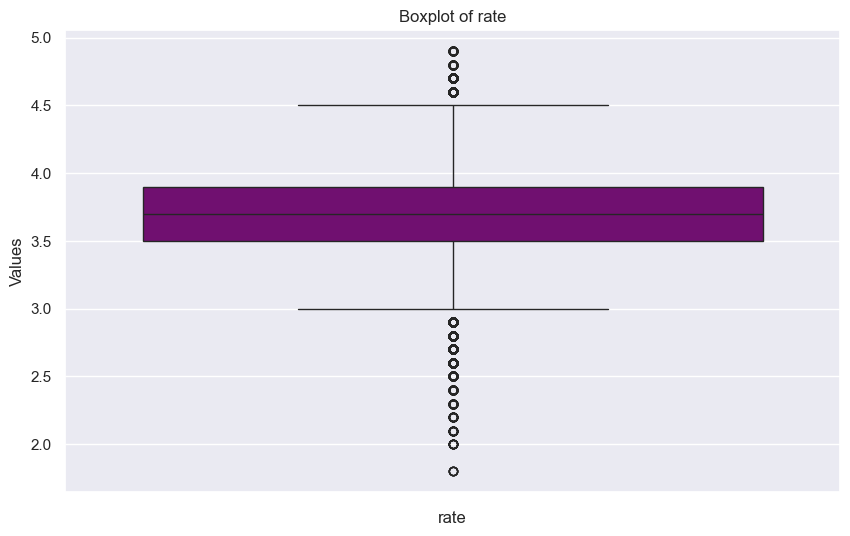

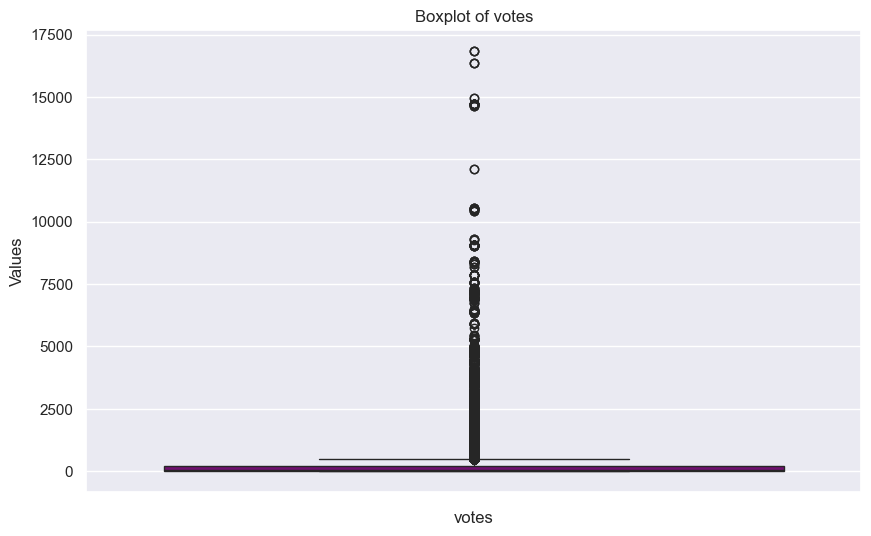

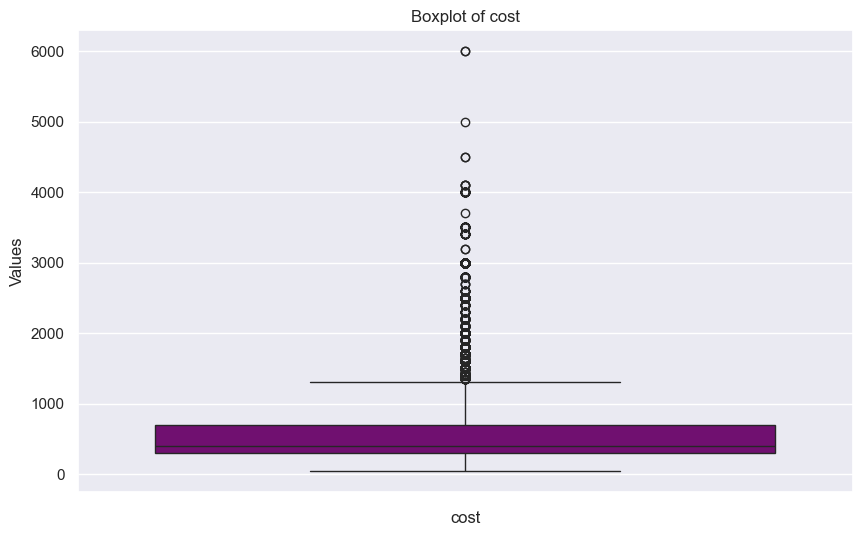

In [215]:
for col in numeric_data:
    if not data[col].empty:
        plt.figure(figsize=(10, 6))
        sns.boxplot(data[col].dropna(),color='Purple')
        plt.title(f"Boxplot of {col}")
        plt.xlabel(col)
        plt.ylabel('Values')
        plt.show()

In [216]:
def remove_outliers(data, columns):
    for column in columns:
        data = data.dropna(subset=[column])
        
        Q1 = np.percentile(data[column], 25)
        Q3 = np.percentile(data[column], 75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
       
        data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
        
    return data

data = remove_outliers(data, ['cost', 'votes'])  


*After removing numerical outliers from votes and cost*

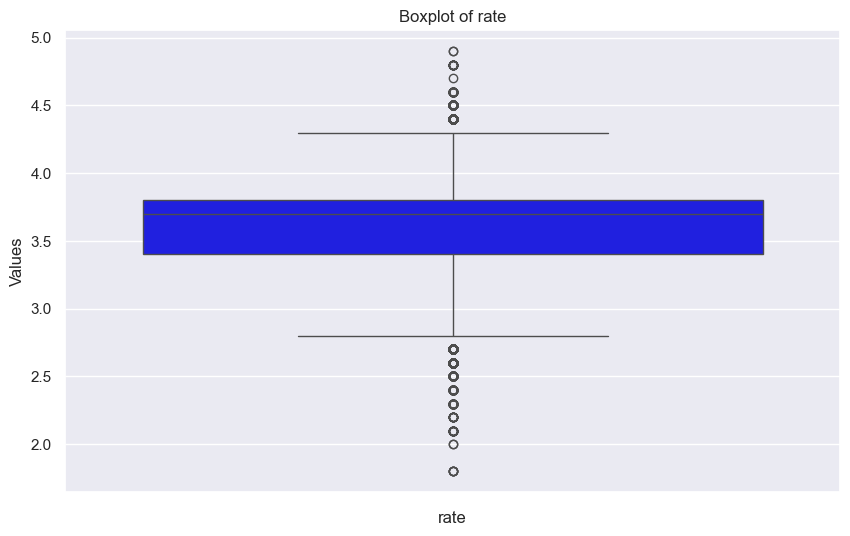

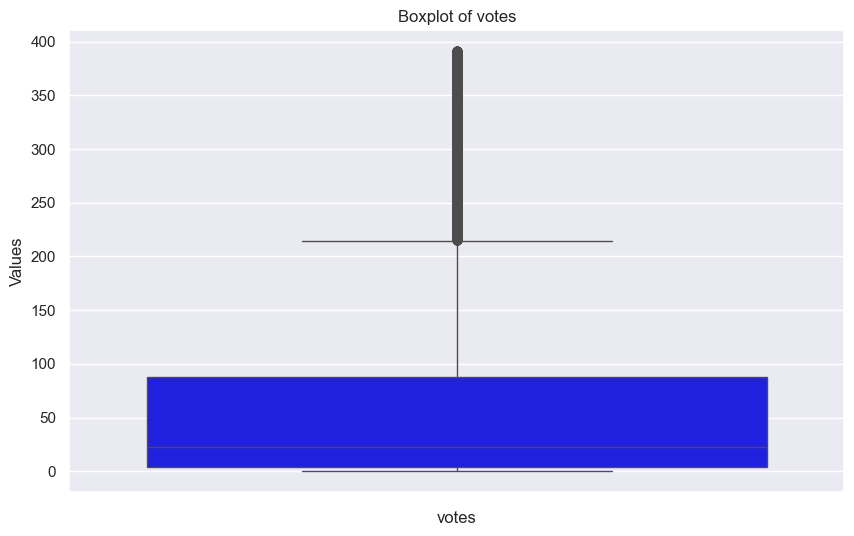

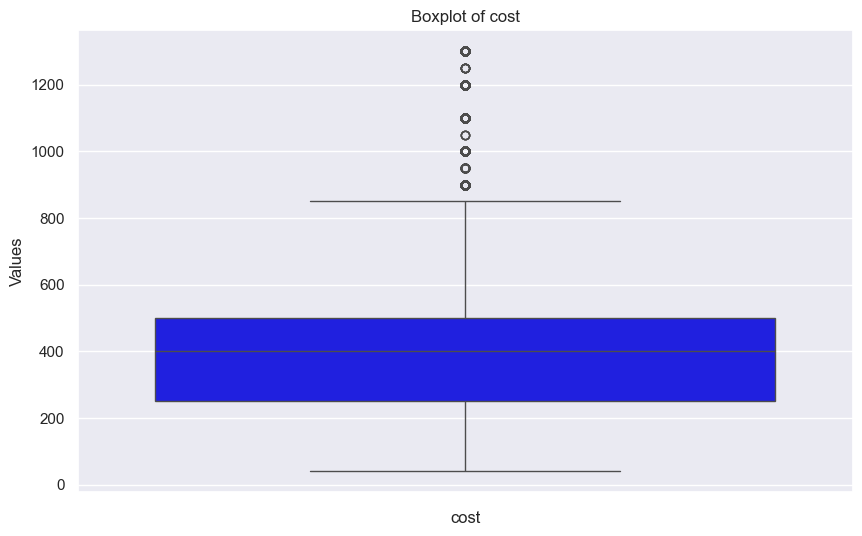

In [217]:
for col in numeric_data:
    if not data[col].empty:
        plt.figure(figsize=(10, 6))
        sns.boxplot(data[col].dropna(), color='blue')
        plt.title(f"Boxplot of {col}")
        plt.xlabel(col)
        plt.ylabel('Values')
        plt.show()

# Research Questions

## Topic 1: Reviews and Rating

Maryam Kashif

### Question 1:

##### How can we visualize the relationship between a restaurant's menu cost with factors such as rating, location, and number of votes, while providing a compelling representation of the distribution of restaurants across various cost ranges?

In [219]:
max_cost = data['cost'].max()

In [220]:
min_cost = data['cost'].min()

In [221]:
num_bins = 3
bins_width = (max_cost - min_cost) / num_bins
bins = []
for i in range(num_bins + 1):  
    bins.append(min_cost + bins_width * i)

print("bins:", bins)

bins: [40.0, 460.0, 880.0, 1300.0]


*Splitting the cost into 3 equal intervals into 3 different categories low , medium, and high*

In [222]:
labels = ['Low', 'Medium', 'High']
data['cost_category'] = pd.cut(data['cost'], bins=bins, labels=labels)


In [223]:
data.head(3)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,menu_item,type,city,cost_category
3,Addhuri Udupi Bhojana,False,False,3.7,88,Banashankari,quick bites,"South Indian, North Indian",300.0,[],Buffet,Banashankari,Low
4,Grand Village,False,False,3.8,166,Basavanagudi,casual dining,North Indian,600.0,[],Buffet,Banashankari,Medium
5,Timepass Dinner,True,False,3.8,286,Basavanagudi,casual dining,North Indian,600.0,[],Buffet,Banashankari,Medium


Text(0.5, 1.0, 'Cost Category vs  Votes')

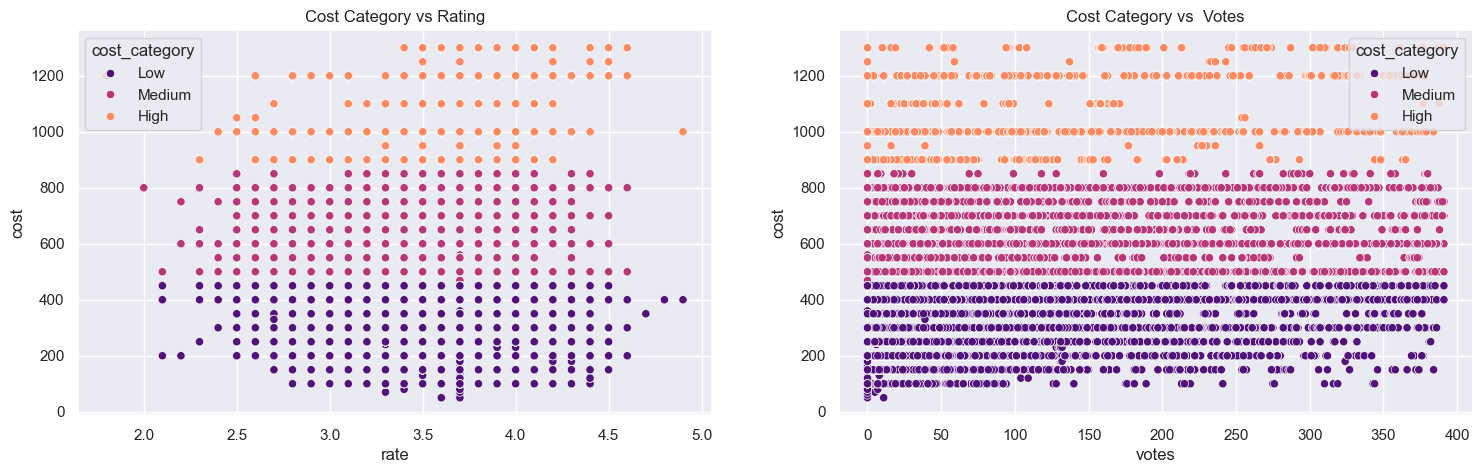

In [225]:
fig, axs = plt.subplots(1, 2, figsize=(18, 5))
sns.scatterplot(x='rate', y='cost', hue='cost_category', data=data, ax=axs[0], palette='magma')
axs[0].set_title('Cost Category vs Rating')
sns.scatterplot(x='votes', y='cost', hue='cost_category', data=data, ax=axs[1], palette='magma')
axs[1].set_title('Cost Category vs  Votes')


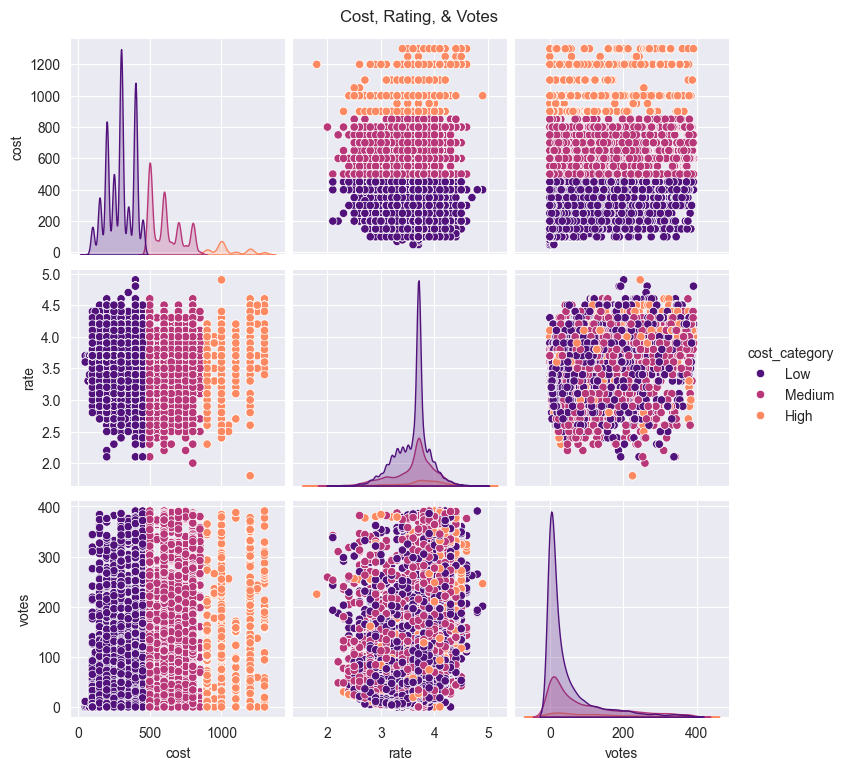

In [ ]:
sns.pairplot(data[['cost', 'rate', 'votes', 'cost_category']], hue='cost_category', palette='magma')
plt.suptitle('Cost, Rating, & Votes', y=1.02)
plt.show()

*Higher-cost categories are distributed across the higher range of ratings, mostly above 3.5. For both medium-cost and low-cost categories, the ratings are more evenly distributed across the full range, from 2.0 to 5.0. There is no strong correlation between cost and rating, although the higher cost category is more likely to achieve higher ratings. However, high ratings are observed across all cost categories.*

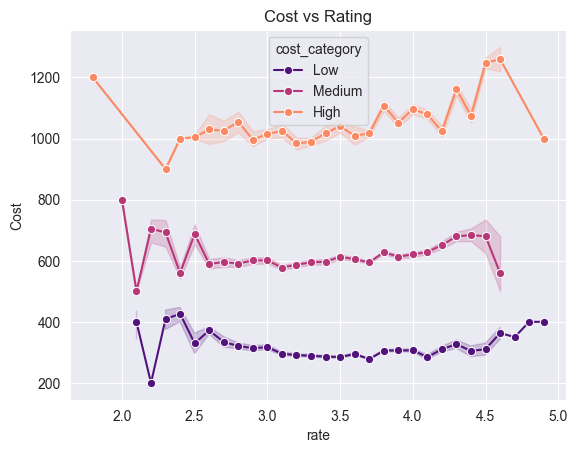

In [ ]:
sns.lineplot(data=data, x='rate', y='cost', marker='o', color='blue',hue='cost_category',palette='magma')
plt.title('Cost vs Rating')
plt.xlabel('rate')
plt.ylabel('Cost')
plt.show()


*Costs for each category show relatively stable trends as ratings increase, with a slight upward trend in the Medium and Low categories near higher ratings around 4.5 rating score. The High cost category exhibits a sharper increase at ratings above 4.0 but shows a drop at 5.0. This indicates that higher-rated options generally correlate with higher costs*








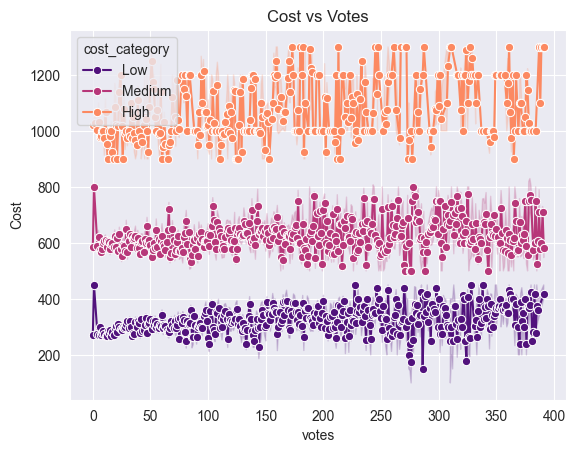

In [ ]:
sns.lineplot(data=data, x='votes', y='cost', marker='o', color='blue',hue='cost_category',palette='magma')
plt.title('Cost vs Votes')
plt.xlabel('votes')
plt.ylabel('Cost')
plt.show()


*The High cost category experiences a sharp increase and decrease of cost for all ranges of votes. The Medium and Low categories has not significant spike until 225 votes showing a slight upward trend. This observation underscores how the High category's costs shows a fluctuating behavior, while the Medium and Low categories show a smoother and more consistent pattern.*

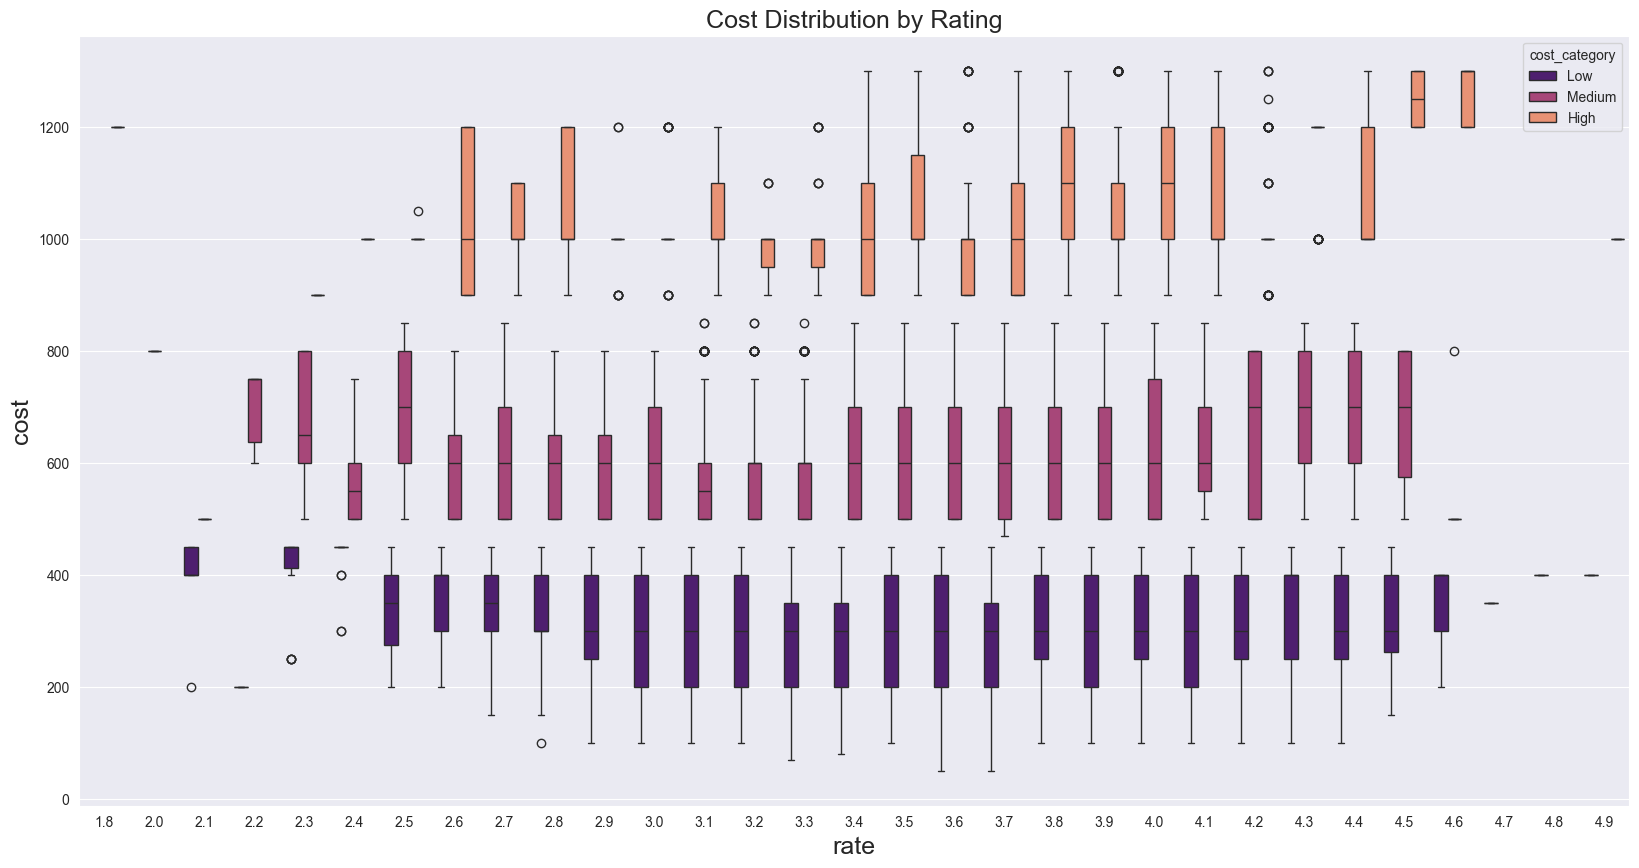

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(data=data, x='rate', y='cost', palette='magma',hue='cost_category')
plt.title('Cost Distribution by Rating',fontsize = 18)
plt.ylabel('cost',fontsize=18)
plt.xlabel('rate',fontsize=18)
plt.show()


In [ ]:
encoded_data = data.copy()
encoded_data['cost_category'] = encoded_data['cost_category'].map({'Low': 0, 'Medium': 1, 'High': 2})

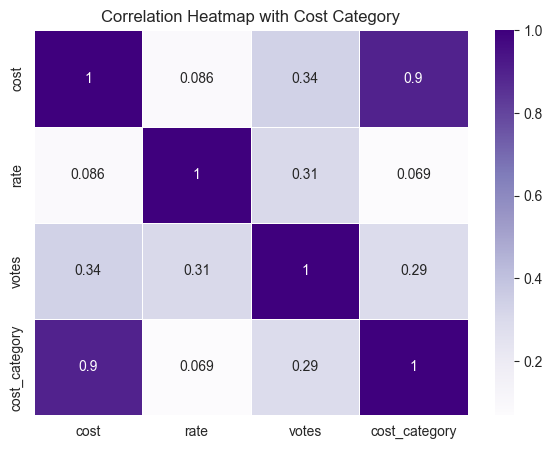

In [ ]:
corr = encoded_data[['cost', 'rate', 'votes', 'cost_category']].corr()

plt.figure(figsize=(7, 5))
sns.heatmap(corr, annot=True, cmap='Purples', cbar=True, linewidths=0.5)
plt.title('Correlation Heatmap with Cost Category')
plt.show()

*The correlation coefficient of cost and votes is 0.34, suggesting a weak/moderate positive correlation. Higher-cost items tend to receive more votes, but this relationship is not very strong. The correlation coefficient of cost and ratings is 0.086, indicating almost no correlation which supports our previous observations with the variables rating and cost.*

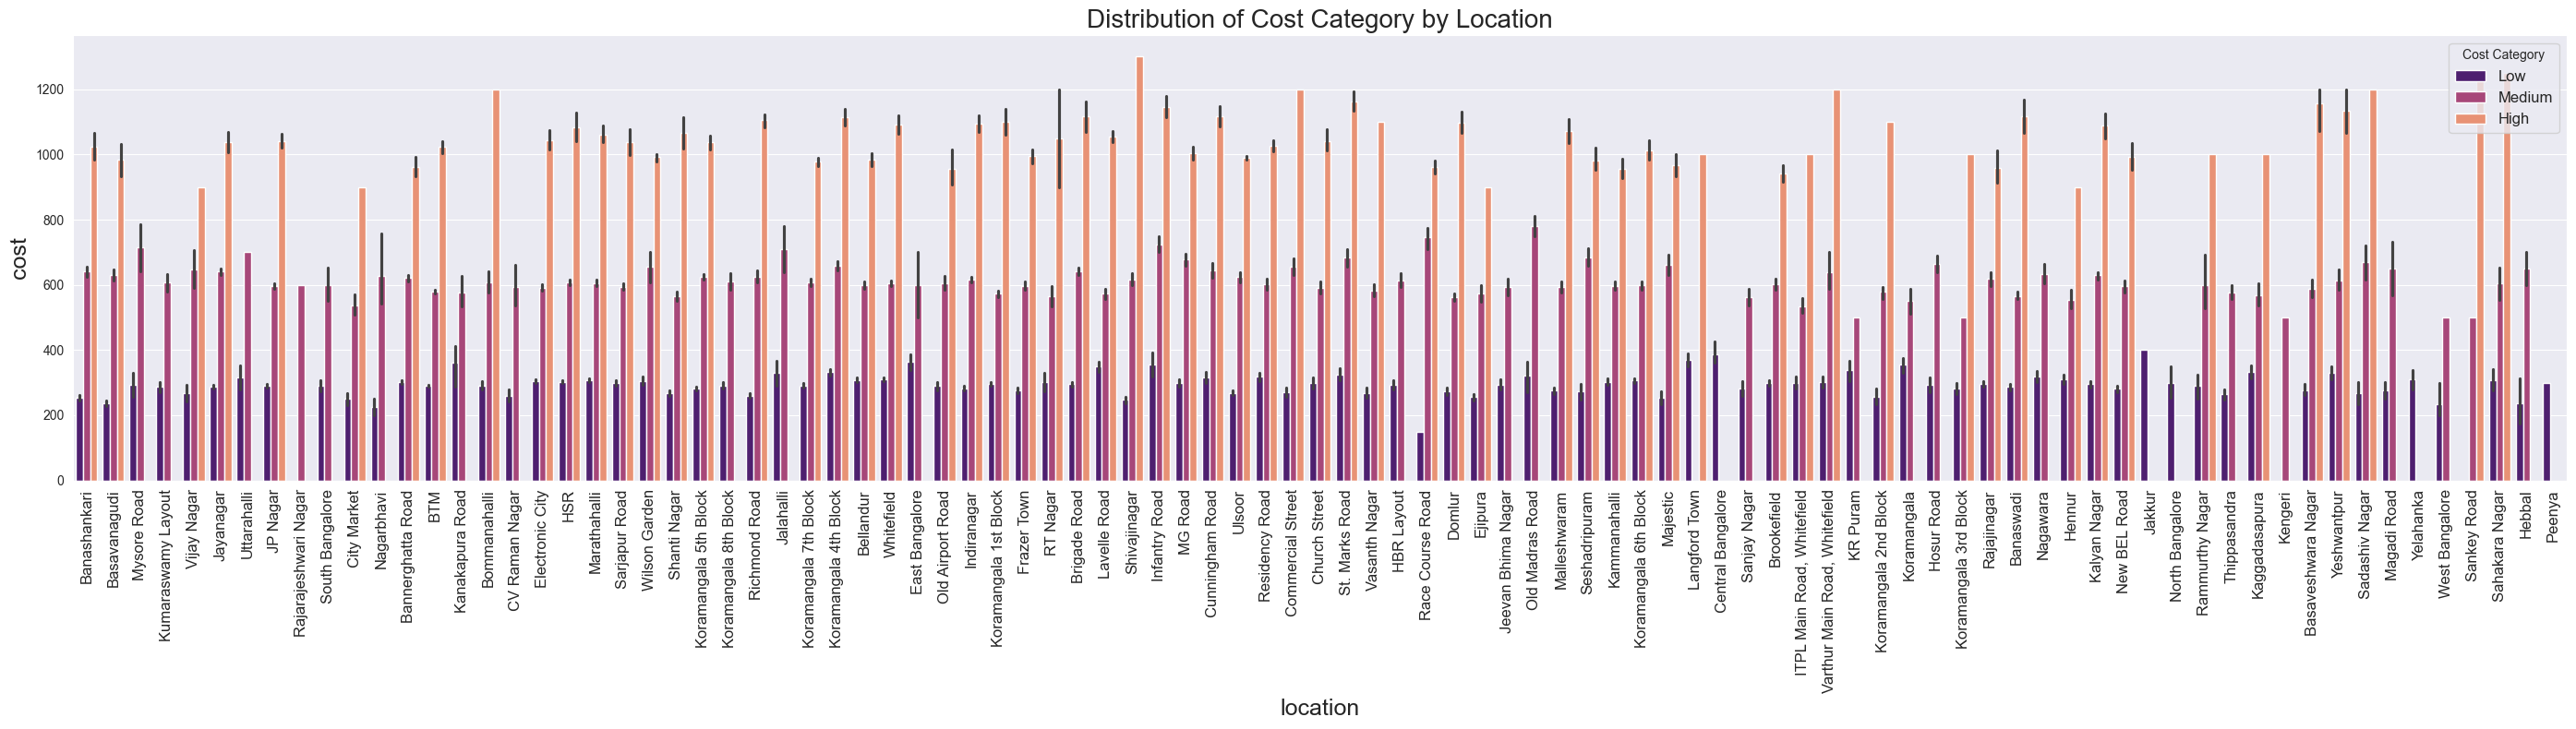

In [ ]:
plt.figure(figsize=(28, 8)) 
sns.barplot(x='location', y='cost', hue='cost_category', data=data, palette='magma', dodge=True)  
plt.title('Distribution of Cost Category by Location', fontsize=20)  #
plt.xlabel('location', fontsize=18) 
plt.ylabel('cost', fontsize=18)  
plt.xticks(rotation=90, fontsize=12)  
plt.legend(title='Cost Category', fontsize=12) 
plt.tight_layout()
plt.show()


*The medium cost category dominates in most areas, followed by high and then low costs. Some locations exhibit a balanced distribution across all three categories, while others are skewed toward Medium or High costs. A few locations have exceptionally high counts in the M,medium category, indicating that pricing dynamics vary significantly between regions.*

### Question 2:

#### To what extent do delivery and takeaway services influence customer ratings compared to traditional dine-in experiences, and what does this reveal about their impact on the overall reputation of Bangalore’s restaurant industry?

In [ ]:
data['service_type'] = data['online_order'].map({True: 'Delivery', False: 'Dine-in'})
grouped_data = data.groupby(['name', 'service_type']).agg({'rate': 'median','votes': 'sum'}).reset_index()

### Bar plot Central Rating by Service Type and Total Votes by Service Type

C:\Users\Roots\AppData\Local\Temp\ipykernel_20964\4046057234.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_data, x='service_type', y='rate', palette='magma'
C:\Users\Roots\AppData\Local\Temp\ipykernel_20964\4046057234.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_data, x='service_type', y='votes', palette='magma', ax=ax[1])


<Figure size 1200x600 with 0 Axes>

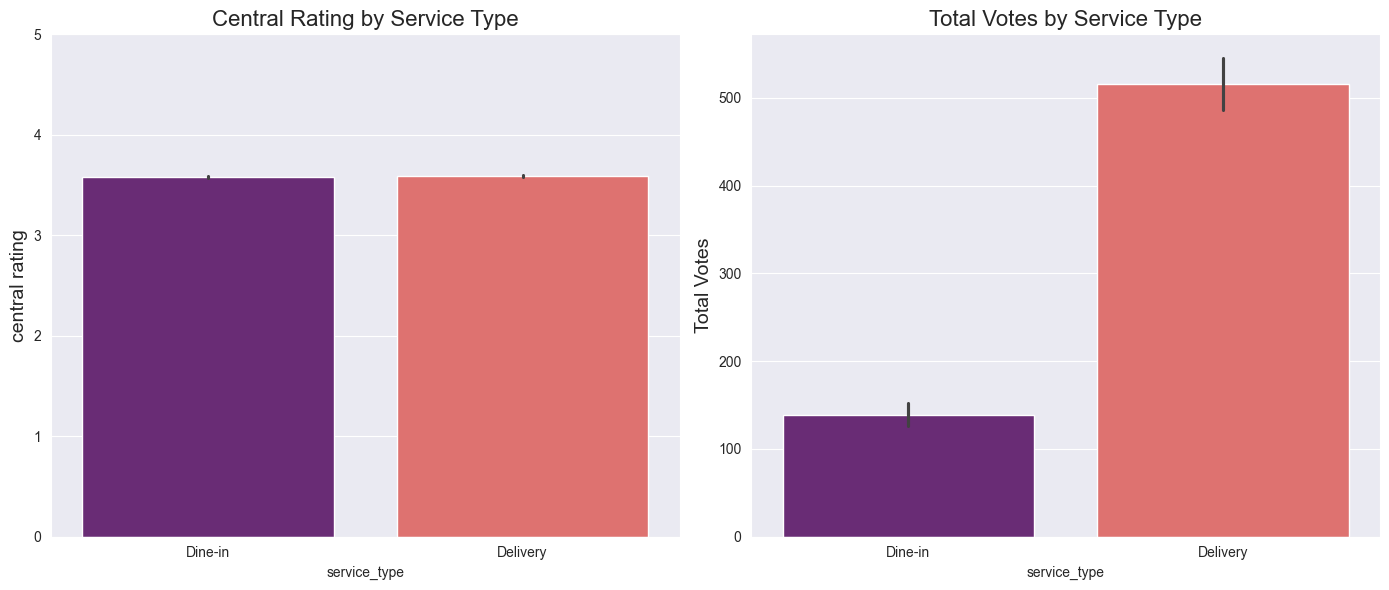

In [ ]:
plt.figure(figsize=(12, 6))
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Average Rating by Service Type
sns.barplot(data=grouped_data, x='service_type', y='rate', palette='magma'
, ax=ax[0])
ax[0].set_title("Central Rating by Service Type", fontsize=16)
ax[0].set_ylim(0, 5) 
ax[0].set_ylabel("central rating", fontsize=14)

# Plot 2: Total Votes by Service Type
sns.barplot(data=grouped_data, x='service_type', y='votes', palette='magma', ax=ax[1])
ax[1].set_title("Total Votes by Service Type", fontsize=16)
ax[1].set_ylabel("Total Votes", fontsize=14)

plt.tight_layout()
plt.show()


*Based on the rating by service type plot we can conclude that the ratings are the same / theirs no significant difference when it comes to both dine-in and delivery services. Votes by Service Type indicates that majority of the Banglahore population votes for delivery over dine-in*

### Box plot of Impact of Service Type on Customer Ratings and Impact of Service Type on Customer Votes

C:\Users\Roots\AppData\Local\Temp\ipykernel_20964\402053846.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=grouped_data, x='service_type', y='rate', palette='magma', ax=ax[0])
C:\Users\Roots\AppData\Local\Temp\ipykernel_20964\402053846.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=grouped_data, x='service_type', y='votes', palette='magma', ax=ax[1])


<Figure size 1400x600 with 0 Axes>

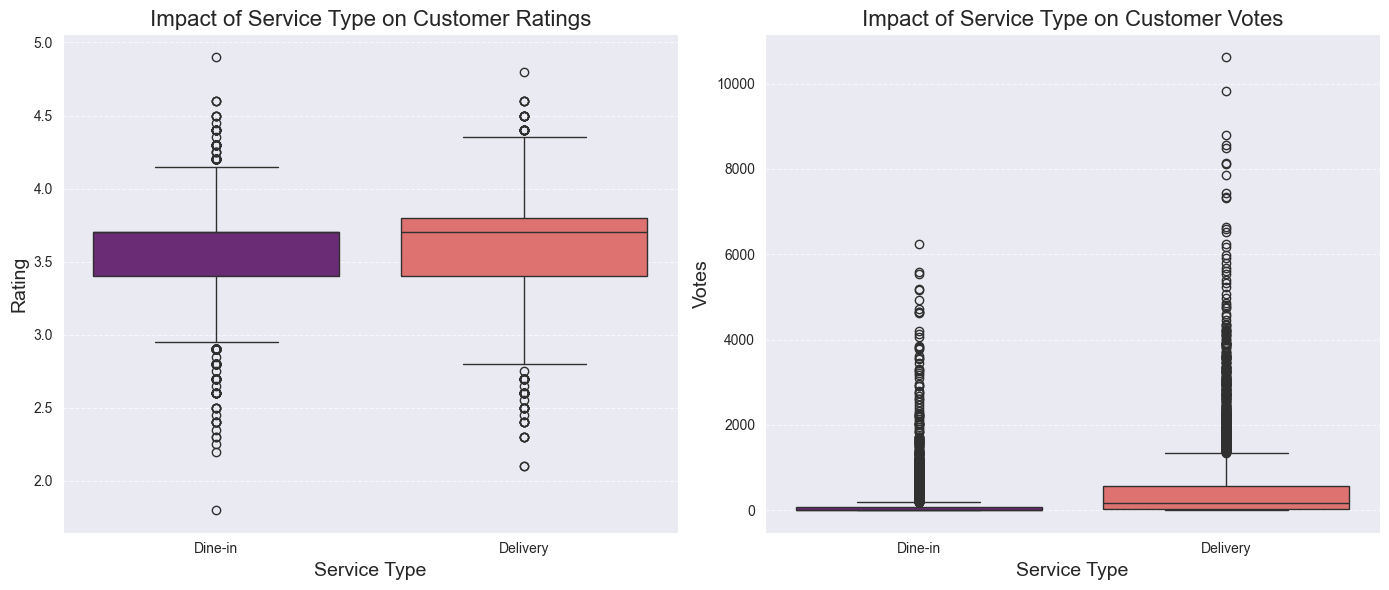

In [ ]:
plt.figure(figsize=(14, 6))  # Set the figure size
fig, ax = plt.subplots(1, 2, figsize=(14, 6)) 
# Boxplot for Impact of Service Type on Customer Ratings
sns.boxplot(data=grouped_data, x='service_type', y='rate', palette='magma', ax=ax[0])
ax[0].set_title("Impact of Service Type on Customer Ratings", fontsize=16)  
ax[0].set_xlabel("Service Type", fontsize=14)  
ax[0].set_ylabel("Rating", fontsize=14)  
ax[0].grid(axis='y', linestyle='--', alpha=0.7) 

# Boxplot for Impact of Service Type on Customer Votes
sns.boxplot(data=grouped_data, x='service_type', y='votes', palette='magma', ax=ax[1])
ax[1].set_title("Impact of Service Type on Customer Votes", fontsize=16)  
ax[1].set_xlabel("Service Type", fontsize=14) 
ax[1].set_ylabel("Votes", fontsize=14)  
ax[1].grid(axis='y', linestyle='--', alpha=0.7) 

plt.tight_layout()
plt.show()

#### Impact of Service Type on Customer Ratings

*The impact of service on customer ratings shows us that the median rating for dine-in is slighty lower than delivery services. However, rating's for dine in services have more wider range than delivery services shown by the IQR. We can indicate that their are several outliers below the minimun rating for dine-in services tells us that dine-services tend to get alot of lower ratings (refering to the outlier below 2.0). outliers show that certain restaurants perform significantly better or worse than the majority in both service types.*

##### Impact of Service Type on Customer Votes

*The median number of votes for dine-in services is significantly lower than that of delivery services. Most dine-in restaurants show a narrow range of votes, as indicated by the smaller interquartile range, compared to the wider variability seen in delivery services. Additionally, while dine-in restaurants have a few notable outliers with high vote counts, delivery services show numerous extreme outliers with exceptionally high vote counts in the upper range.*

### Scatter plot of Ratings vs. Number of Restaurants for Each Service Type

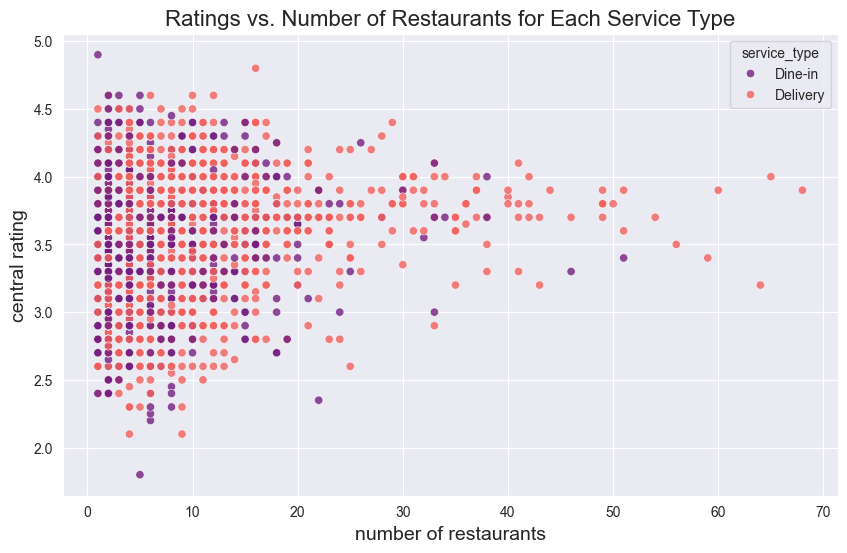

In [ ]:
restaurant_counts = data.groupby(['name', 'service_type']).size().reset_index(name='restaurant_count')

restaurant_data = data.groupby(['name', 'service_type']).agg({'rate': 'median'}).reset_index()
restaurant_data = restaurant_data.merge(restaurant_counts, on=['name', 'service_type'])

plt.figure(figsize=(10, 6))
sns.scatterplot(
 data=restaurant_data, 
    x='restaurant_count', 
    y='rate', 
    hue='service_type', 
    palette='magma', 
    alpha=0.8
)

plt.title("Ratings vs. Number of Restaurants for Each Service Type", fontsize=16)
plt.xlabel("number of restaurants", fontsize=14)
plt.ylabel("central rating", fontsize=14)
plt.grid(True)
plt.show()


 *Both service types cluster around ratings of 3.0 to 4.0, with delivery restaurants showing greater variation and distribution, including more outliers at higher ratings above 4.5 that we have also seen in the boxplot. Overall, most restaurants fall within the mid-range ratings, with only a few achieving exceptionally high or low scores.*

### Scatter plot Votes vs. Number of Restaurants for Each Service Type

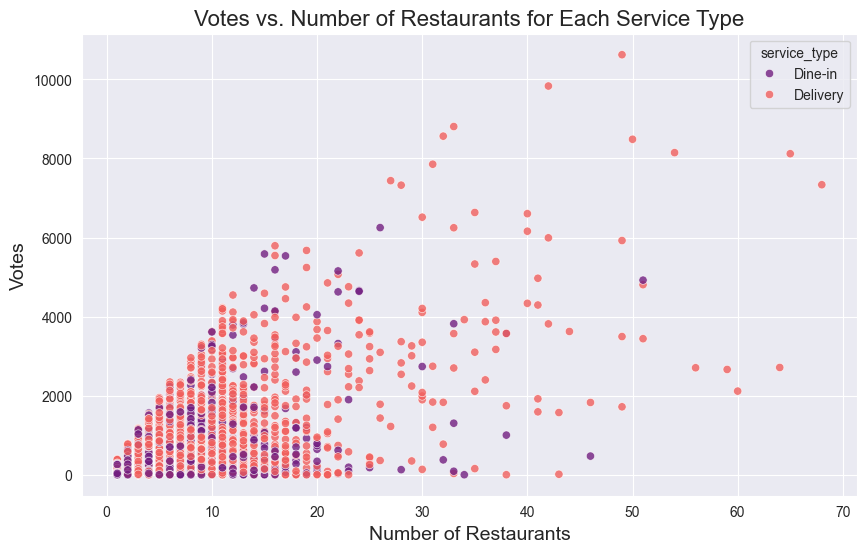

In [ ]:
restaurant_counts = data.groupby(['name', 'service_type']).size().reset_index(name='restaurant_count')

restaurant_data = data.groupby(['name', 'service_type']).agg({'votes': 'sum'}).reset_index()
restaurant_data = restaurant_data.merge(restaurant_counts, on=['name', 'service_type'])

plt.figure(figsize=(10, 6))
sns.scatterplot(
 data=restaurant_data, 
    x='restaurant_count', 
    y='votes', 
    hue='service_type', 
    palette='magma', 
    alpha=0.8
)

plt.title("Votes vs. Number of Restaurants for Each Service Type", fontsize=16)
plt.xlabel("Number of Restaurants", fontsize=14)
plt.ylabel("Votes", fontsize=14)
plt.grid(True)
plt.show()


*There is a cluster of both services featuring 20 restaurants with votes ranging from 0 to 4000. Delivery restaurants exhibit greater variation and a wider distribution, including more outliers in terms of votes. Overall, the majority of restaurants fall within the 0 to 4000 vote range, with only a few attaining exceptionally high vote counts.*

### Question 3: 
#### How do geographical factors such as location influence the ratings and reviews of restaurants?

*First im checking the count of ratings per location to see which location got the most ratings*

### Bar plot for Total Reviews by Location

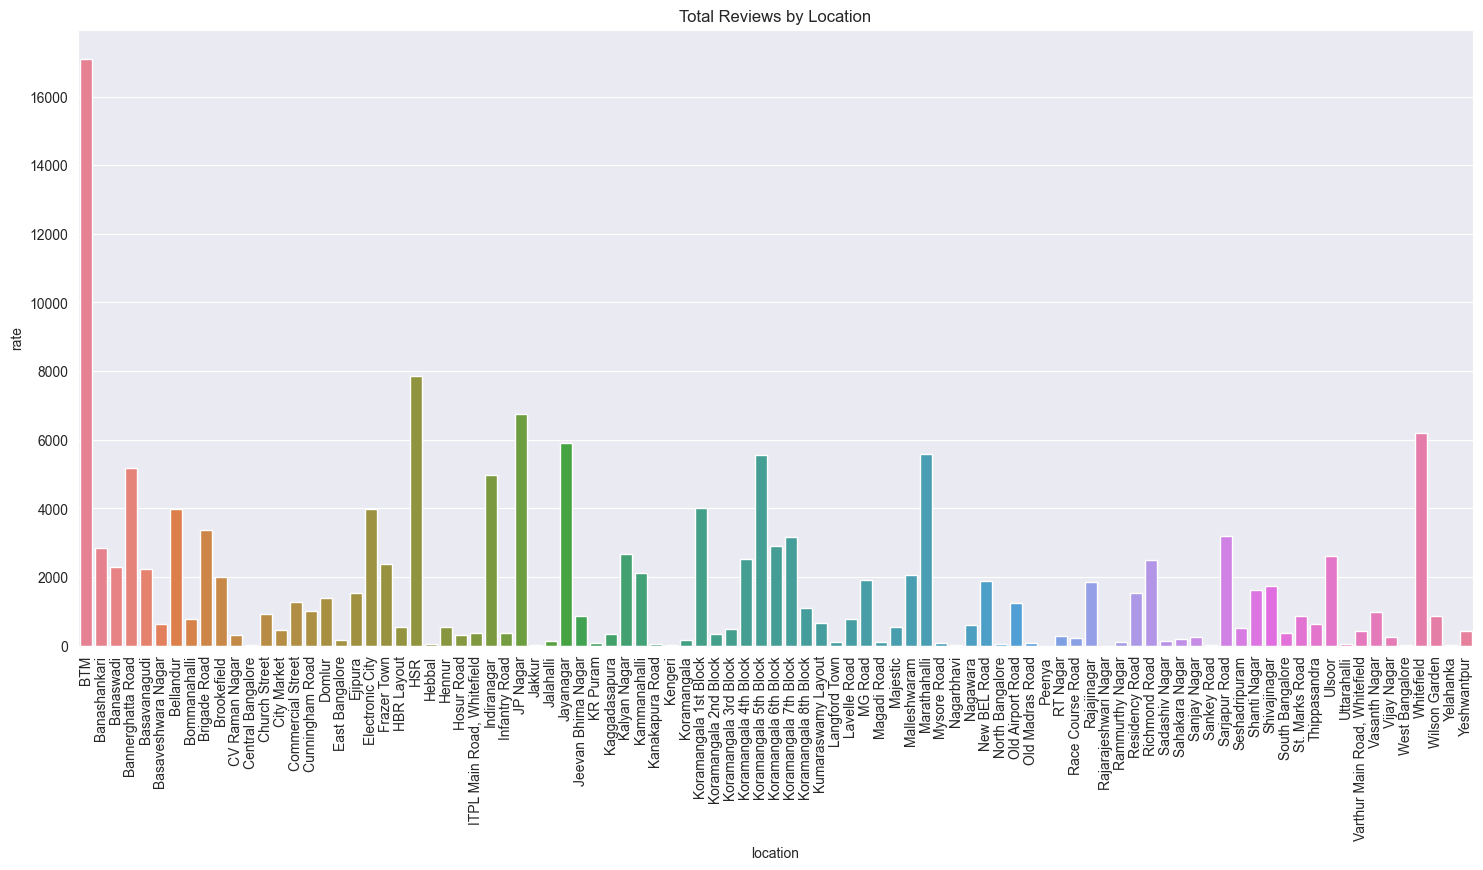

In [ ]:
location_rate_count = data.groupby('location')['rate'].sum().reset_index()
plt.figure(figsize=(18, 8))
sns.barplot(data=location_rate_count, x='location', y='rate',hue='location')
plt.title('Total Reviews by Location')
plt.xticks(rotation=90)
plt.show()

*Here we can see that BTM got the highest number of reviews*

### Bar plot for Central Rating by Location

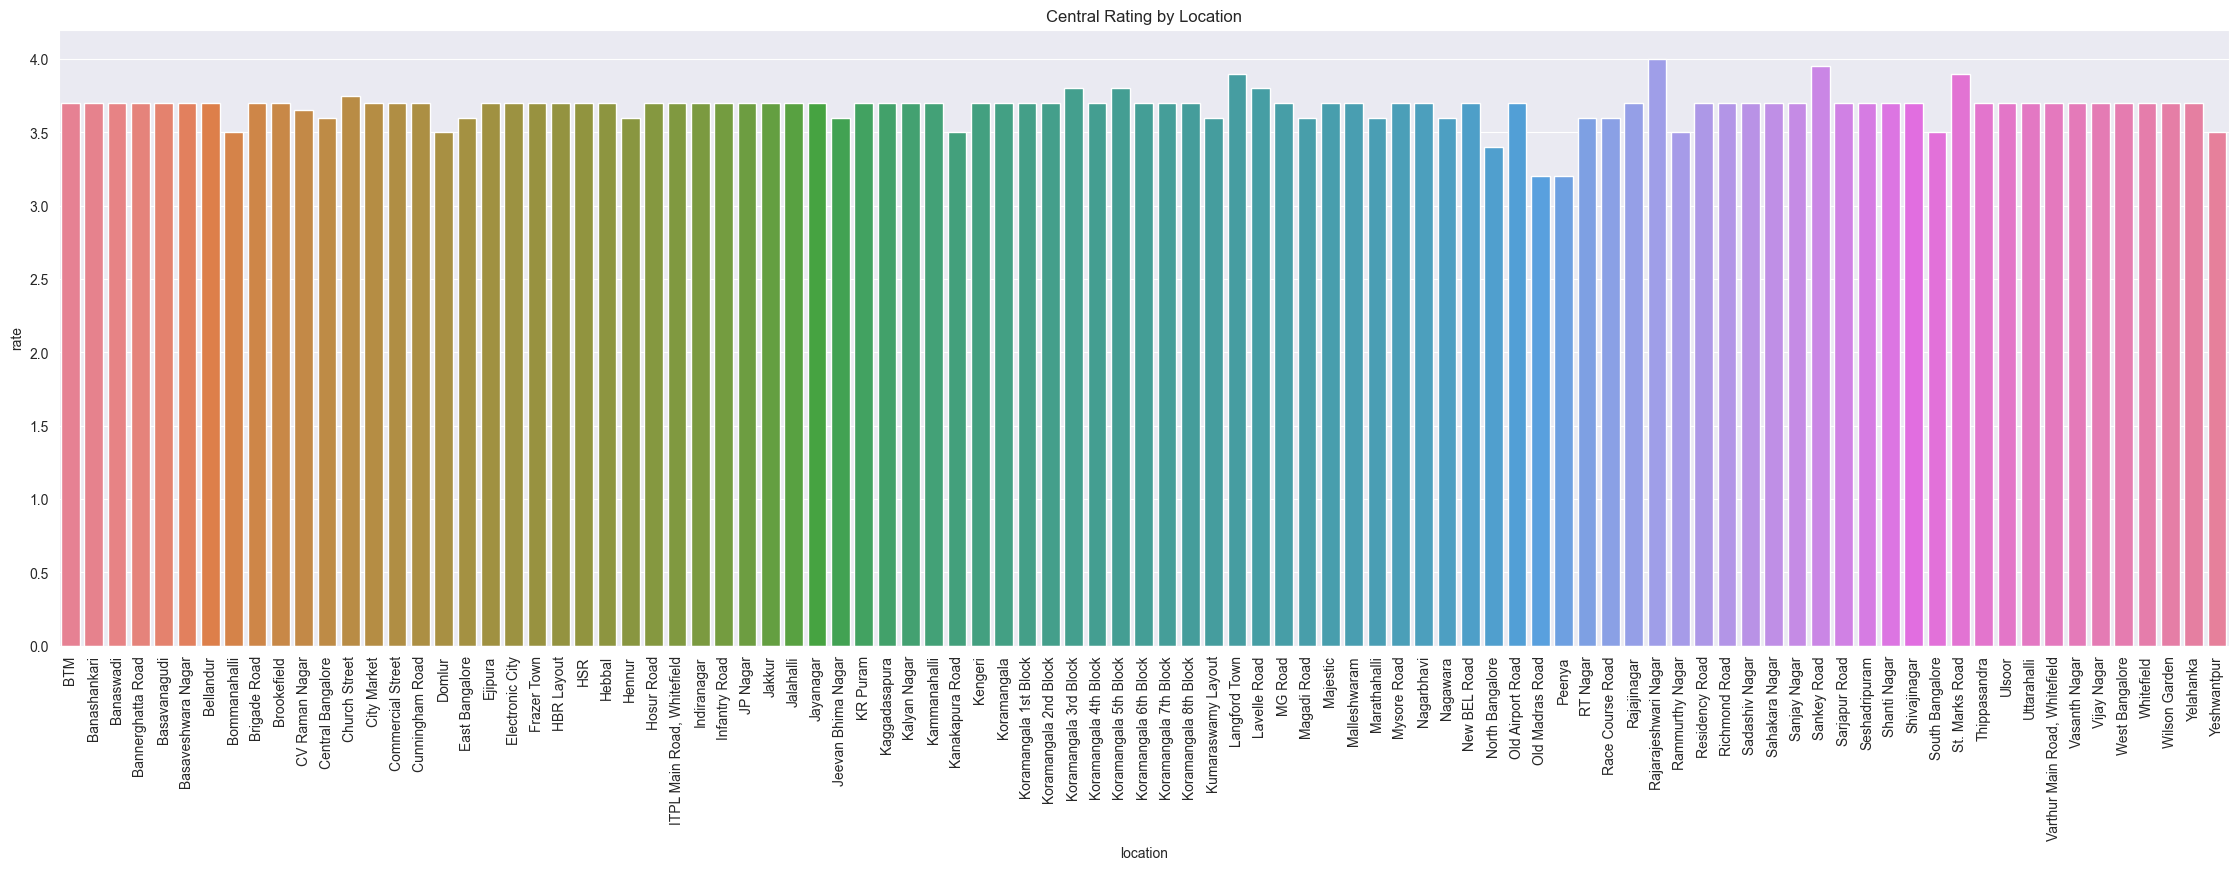

In [ ]:
location_rate = data.groupby('location')['rate'].median().reset_index()
plt.figure(figsize=(28, 8)) 
sns.barplot(data=location_rate, x='location', y='rate', hue='location')
plt.title('Central Rating by Location')
plt.xticks(rotation=90)
plt.show()

In [ ]:
locations = pd.DataFrame({"location": data['location'].unique()})
locations['location'] = locations['location'].apply(lambda x: "Bangalore " + str(x))

lat_lon = []
geolocator = Nominatim(user_agent="app")
for location_name in locations['location']:
    location = geolocator.geocode(location_name)
    if location is None:
        lat_lon.append(np.nan)
    else:
        geo = (location.latitude, location.longitude)
        lat_lon.append(geo)

locations['geo_loc'] = lat_lon

In [ ]:
locations['geo_loc'].isna().sum()
locations= locations.dropna(subset=['geo_loc'])

In [ ]:
lat,lon=zip(*np.array(locations['geo_loc']))
locations['lat']=lat
locations['lon']=lon

In [ ]:
locations["location"]=locations['location'].apply(lambda x :  x.replace("Bangalore","")[1:])
locations.head()

,location,geo_loc,lat,lon
0,Banashankari,"(12.9393328, 77.5539819)",12.939333,77.553982
1,Basavanagudi,"(12.9417261, 77.5755021)",12.941726,77.575502
2,Mysore Road,"(12.940155707303814, 77.52402630335858)",12.940156,77.524026
3,Kumaraswamy Layout,"(12.9067683, 77.5595021)",12.906768,77.559502
5,Jayanagar,"(12.9399039, 77.5826382)",12.939904,77.582638


In [ ]:
merged_df = pd.merge(data, locations, left_on='location', right_on='location')

grouped_df = merged_df.groupby('name').agg({
    'lat': 'first', 
    'lon': 'first', 
    'rate': 'median', 
    'votes': 'sum', 
    'location': 'first'
}).reset_index()

### Scatter plot for Ratings vs Distance from Bangalore City Center

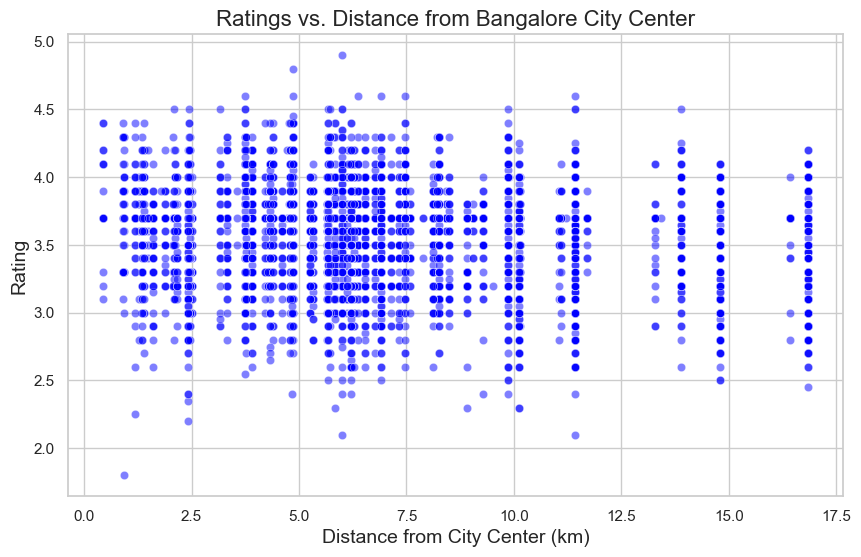

In [ ]:
city_center_coords = (12.9716, 77.5946)  # Example: Bangalore city center (latitude, longitude)

def calculate_distance(lat, lon, city_center_coords):
    return geodesic((lat, lon), city_center_coords).km #here im getting the latitude and longitude for the center coordinates

grouped_df['distance_from_center'] = grouped_df.apply(
    lambda row: calculate_distance(row['lat'], row['lon'], city_center_coords), axis=1)

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.scatterplot(data=grouped_df, x='distance_from_center', y='rate', color='blue', alpha=0.5)
plt.title('Ratings vs. Distance from Bangalore City Center', fontsize=16)
plt.xlabel('Distance from City Center (km)', fontsize=14)
plt.ylabel('Rating', fontsize=14)

plt.show()

 *The data points are densely clustered between 3.0 and 4.5 across most distances, indicating that ratings remain relatively consistent regardless of the city center. There is no obvious trend suggesting a strong correlation between distance and ratings. However, the density of points starts to decrease at greater distances. Overall, the plot indicates that distance from the city center does not significantly impact the ratings.*

In [ ]:
map_one = folium.Map(location=[grouped_df['lat'].mean(), grouped_df['lon'].mean()], zoom_start=10)

heat_data = [[row['lat'], row['lon'], row['rate']] for index, row in grouped_df.iterrows()]
HeatMap(heat_data, radius=15).add_to(map_one)

In [ ]:
#map_one
map_one.show_in_browser()

Your map should have been opened in your browser automatically.
Press ctrl+c to return.


In [ ]:
map_center = [grouped_df['lat'].mean(), grouped_df['lon'].mean()]  # Center the map based on the grouped coordinates
map_two = folium.Map(location=map_center, zoom_start=12)


Your map should have been opened in your browser automatically.
Press ctrl+c to return.


In [ ]:
def get_color(rating, votes):
    # Define color palette based on rating
    if rating >= 4.5:
        rating_color = 'gold'  # A golden color for high ratings
    elif rating >= 3.5:
        rating_color = 'yellowgreen'  # A yellow-green for moderate ratings
    else:
        rating_color = 'lightcoral'  # A light coral color for lower ratings
    
    # Define color palette based on the number of votes
    if votes > 500:
        votes_color = 'darkblue'  # Dark blue for higher vote count
    elif votes > 100:
        votes_color = 'teal'  # Teal for medium vote count
    else:
        votes_color = 'lightseagreen'  # Light sea green for lower vote count
    
    return rating_color, votes_color


In [ ]:
for index, row in grouped_df.iterrows():
    heat_data.append([row['lat'], row['lon'], row['rate']])
    
    rating_color, votes_color = get_color(row['rate'], row['votes'])
    
    iframe = IFrame(f"<b>Restaurant name:</b> {row['name']}<br><b>Location:</b> {row['location']}<br><b>Rating:</b> {row['rate']}<br><b>Total Votes:</b> {row['votes']}", width=200, height=150)
    popup = folium.Popup(iframe, max_width=2650)
    
    folium.CircleMarker(
        location=[row['lat'], row['lon']],
        radius=10,
        color=rating_color,  # Color based on rating
        fill=True,
        fill_color=votes_color,  # Fill based on votes
        fill_opacity=0.7,
        popup=popup
    ).add_to(map_two)

In [ ]:
HeatMap(heat_data).add_to(map_two)

### Heat map of ratings and votes per Location

In [ ]:
#map_two
map_two.show_in_browser()

### Question 2: 

## Topic 2: Cuisine Analysis
Farida Ismail

### Question 1: does the booking availability have any discernible impact on the distribution or skewness of the ratings?

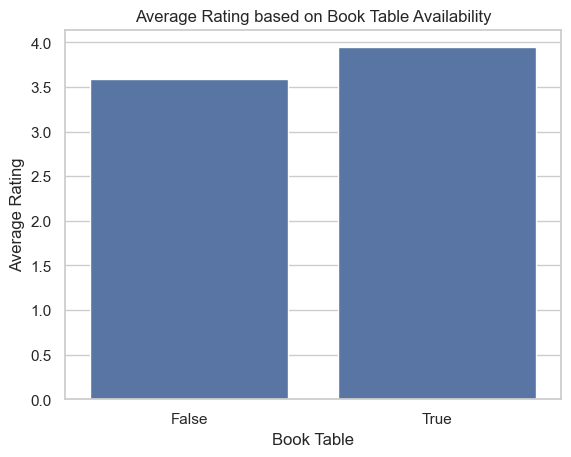

In [ ]:
avg_ratings = data.groupby('book_table')['rate'].mean().reset_index()

# make a bar plot to visual the data
sns.barplot(x='book_table', y='rate', data=avg_ratings)
plt.xlabel('Book Table')
plt.ylabel('Average Rating')
plt.title('Average Rating based on Book Table Availability')
plt.show()

### Question 2: 

## Topic 3: Customer Preferences
Danya Danish

### Question 1: 
Can we tell if an area is richer or poorer based on the Which Restaurant Types and Cost Options are more popular?

### Question 2: 

## Topic 4: Correlations and Patterns
Mariam El Gamal

### Question 1: 

##### How do chain restaurants compare to independent restaurants in terms of ratings, and does the impact of restaurant type on ratings vary across different customer engagement levels with factors such as online orders?

In [ ]:
restaurant_counts = data['name'].value_counts()
data['restaurant_type'] = data['name'].apply(
    lambda x: 'Chain' if restaurant_counts[x] > 1 else 'Independent'
)

### Bar plot: Average Rating vs Online Order (Chain vs Independent)

C:\Users\Roots\AppData\Local\Temp\ipykernel_20964\4058487523.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='restaurant_type', y='rate', palette='Set2')


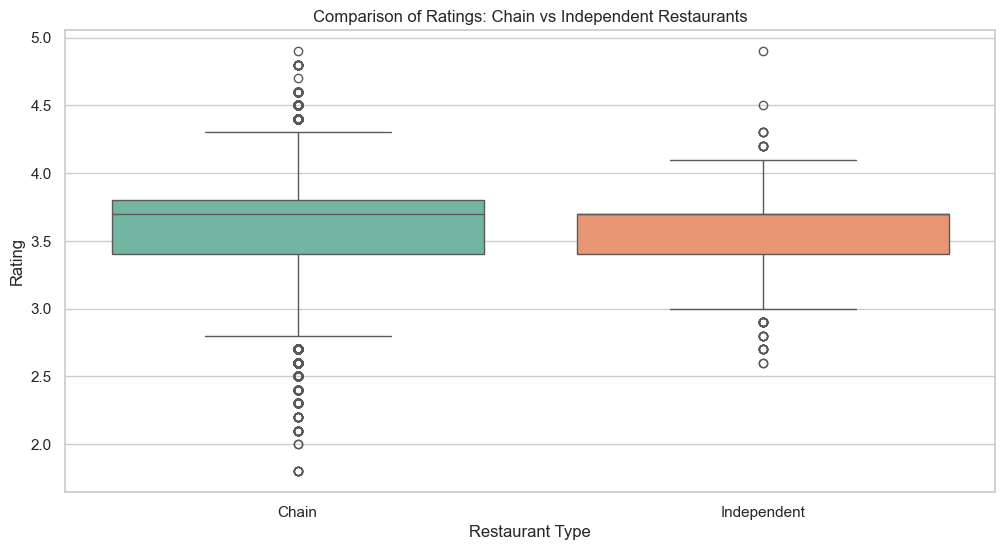

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='restaurant_type', y='rate', palette='Set2')
plt.title('Comparison of Ratings: Chain vs Independent Restaurants')
plt.xlabel('Restaurant Type')
plt.ylabel('Rating')
plt.show()

### Bar plot: Average Rating vs Online Order (Chain vs Independent)

C:\Users\Roots\AppData\Local\Temp\ipykernel_20964\3354004529.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='online_order', y='rate', hue='restaurant_type', palette='Set2', ci=None)


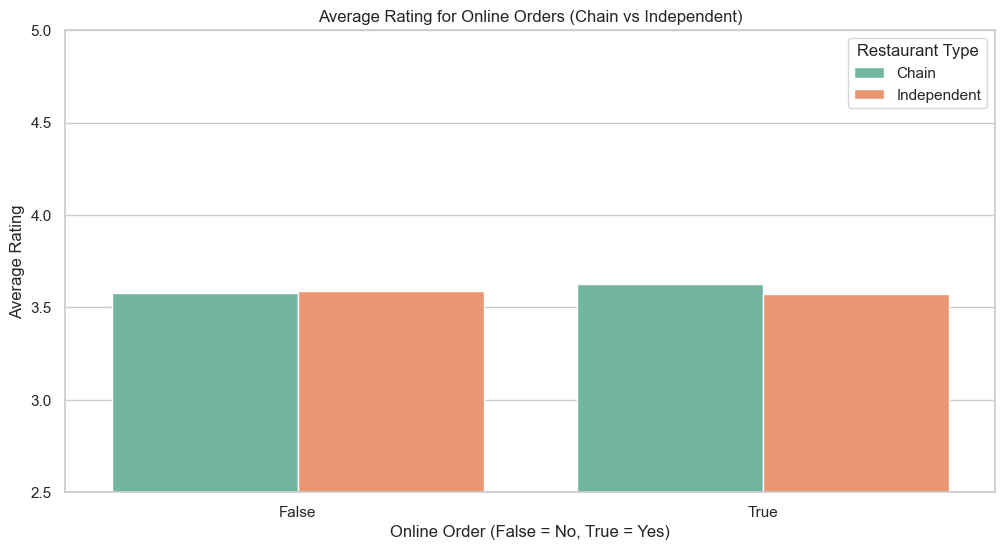

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=data, x='online_order', y='rate', hue='restaurant_type', palette='Set2', ci=None)
plt.title('Average Rating for Online Orders (Chain vs Independent)')
plt.xlabel('Online Order (False = No, True = Yes)')
plt.ylabel('Average Rating')
plt.legend(title='Restaurant Type')
plt.ylim(2.5, 5)  
plt.show()

### Bar plot: Average Rating vs Book Table (Chain vs Independent)

C:\Users\Roots\AppData\Local\Temp\ipykernel_20964\146308109.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='book_table', y='rate', hue='restaurant_type', palette='Set2', ci=None)


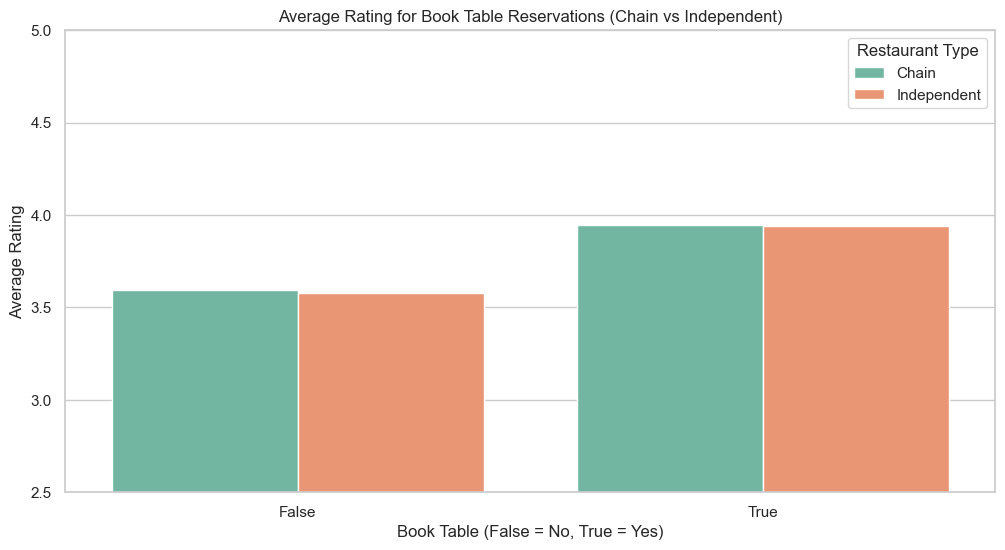

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=data, x='book_table', y='rate', hue='restaurant_type', palette='Set2', ci=None)
plt.title('Average Rating for Book Table Reservations (Chain vs Independent)')
plt.xlabel('Book Table (False = No, True = Yes)')
plt.ylabel('Average Rating')
plt.legend(title='Restaurant Type')
plt.ylim(2.5, 5)  
plt.show()

### Question 2: 

#### Can the diversity of cuisines offered (number of cuisines) predict a restaurant’s rating and popularity (votes) in Bangalore?

### Line Plot for Average Rating vs. Number of Cuisines

In [ ]:

# Add a column that counts the number of cuisines in each row
data['num_cuisines'] = data['cuisines'].apply(lambda x: len(x.split(',')) if isinstance(x, str) else 0)

grouped_data = data.groupby('num_cuisines').agg({
    'rate': 'median',  # Average rating
    'votes': 'mean'  
}).reset_index()

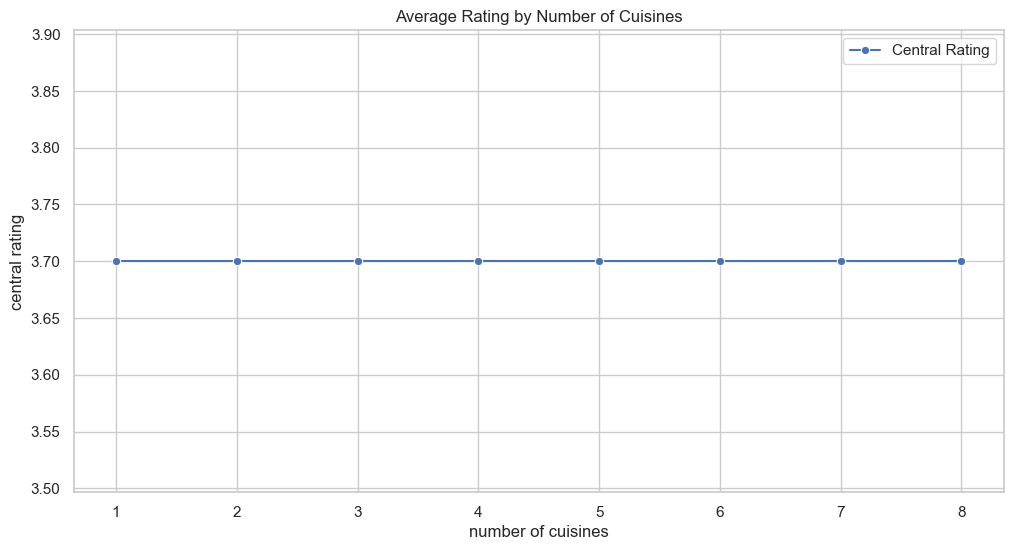

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='num_cuisines', y='rate', data=grouped_data , marker='o', color='b', label='Central Rating')
plt.title('Average Rating by Number of Cuisines')
plt.xlabel('number of cuisines')
plt.ylabel('central rating')
plt.legend()
plt.show()

### Line Plot for Average Votes vs. Number of Cuisines

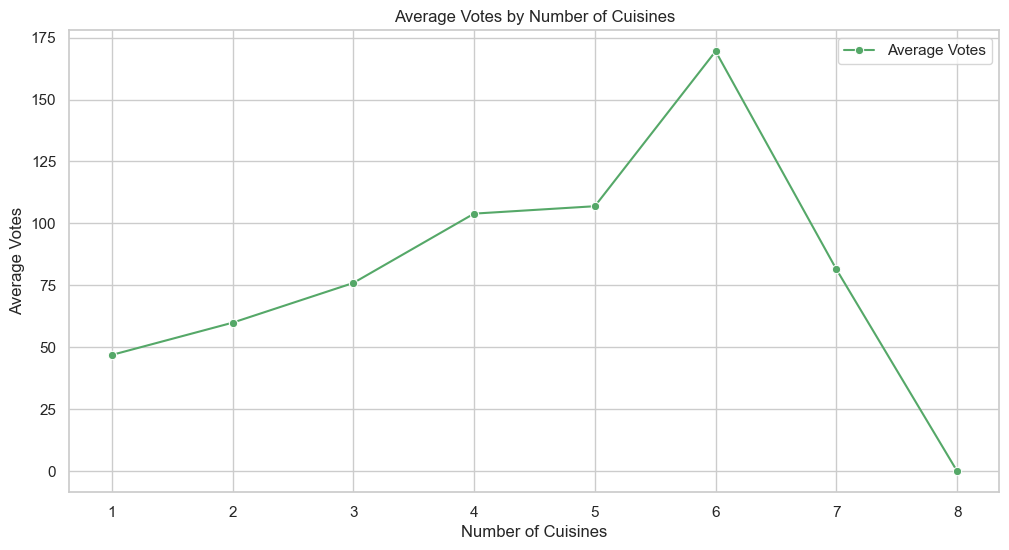

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='num_cuisines', y='votes', data=grouped_data, marker='o', color='g', label='Average Votes')
plt.title('Average Votes by Number of Cuisines')
plt.xlabel('Number of Cuisines')
plt.ylabel('Average Votes')
plt.legend()
plt.show()